___


# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
- <Strong> `Roi Jared Flores Garza Stone` </Strong>
- <Strong> `Rafael Takata García` </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `roi.flores@iteso.mx` </font>
- <Strong> Email: </Strong>  <font color="blue"> `rafael.takata@iteso.mx` </font>
___




### OBJETIVO: 

El objetivo del proyecto es evaluar el conocimiento adquirido sobre la preparación de datos y construcción de modelos predictivos tanto para problemas de regresión como de clasificación.  Se busca abordar la construcción de los modelos, fundamentar por medio de la comunicación de resultados, evaluación de las predicciones del modelo y la metodología establecida para la preparación de los datos. 


### Entrega 1:


# Regresión

### Definición del problema:

La NBA (National Basketball Association), fundada en 1946 en Estados Unidos, es ampliamente reconocida como la liga de baloncesto profesional más prestigiosa y competitiva del mundo. Con equipos distribuidos en ciudades de Estados Unidos y Canadá, la NBA ha atraído a los mejores jugadores de diversos países, convirtiéndose en un fenómeno global que trasciende fronteras y culturas.

Al igual que en otras ligas estadounidenses, la NBA registra meticulosamente estadísticas y datos de cada partido, lo que permite un análisis profundo del rendimiento de los jugadores, patrones de juego, y proyecciones sobre el éxito de los equipos. Esta abundancia de información es clave para optimizar estrategias, tomar decisiones y entender el impacto de cada jugador en la cancha.

En este análisis, utilizaremos los datos de la temporada 2023 para predecir la cantidad de puntos que anotarán los jugadores, una métrica fundamental para evaluar el rendimiento en el juego. El conjunto de datos se ha obtenido de Kaggle y puede consultarse en el siguiente enlace: [NBA Players Stats 2023 Season](https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season?resource=download).

##### Las variables que contiene el dataset son las siguientes:

| Descripción                                                                                       | Columna |
|--------------------------------------------------------------------------------------------------|---------|
| Nombre del jugador de baloncesto                                                                  | PName   |
| Posición del jugador en el juego, incluyendo 'N/A'                                               | POS     |
| Abreviatura del equipo para el cual el jugador juega en esta temporada                           | Team    |
| Edad del jugador                                                                                 | Age     |
| Número total de juegos que el jugador ha jugado esta temporada                                   | GP      |
| Número total de juegos ganados por el jugador                                                    | W       |
| Número total de juegos perdidos por el jugador                                                   | L       |
| Total de minutos jugados por el jugador en esta temporada                                        | Min     |
| Total de puntos anotados por el jugador [objetivo]                                               | PTS     |
| Total de tiros de campo acertados por el jugador                                                 | FGM     |
| Total de tiros de campo intentados por el jugador                                                | FGA     |
| Porcentaje de éxito en tiros de campo realizados por el jugador                                  | FG%     |
| Total de tiros de 3 puntos acertados por el jugador                                              | 3PM     |
| Total de tiros de 3 puntos intentados por el jugador                                             | 3PA     |
| Porcentaje de éxito en tiros de 3 puntos realizados por el jugador                               | 3P%     |
| Total de tiros libres acertados por el jugador                                                   | FTM     |
| Total de tiros libres intentados por el jugador                                                  | FTA     |
| Porcentaje de éxito en tiros libres realizados por el jugador                                    | FT%     |
| Total de rebotes ofensivos realizados por el jugador                                             | OREB    |
| Total de rebotes defensivos realizados por el jugador                                            | DREB    |
| Total de rebotes (ofensivos + defensivos) realizados por el jugador                              | REB     |
| Total de asistencias realizadas por el jugador                                                   | AST     |
| Total de pérdidas de balón realizadas por el jugador                                             | TOV     |
| Total de robos realizados por el jugador                                                         | STL     |
| Total de bloqueos realizados por el jugador                                                      | BLK     |
| Total de faltas personales realizadas por el jugador                                             | PF      |
| Total de puntos de fantasía de la NBA realizados por el jugador                                  | FP      |
| Total de dobles-dobles realizados por el jugador                                                 | DD2     |
| Total de triples-dobles realizados por el jugador                                                | TD3     |
| Diferencia total entre la puntuación del equipo del jugador y la del oponente mientras él juega  | +/-     |


##### Librerías a usar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
import seaborn as sns
import math
import scipy.stats as stats
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('../docs/2023_nba_player_stats.csv')
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [4]:
df.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


A manera de irnos adentrando en los datos, revisaremos algunas gráficas que nos parecen interesantes de saber para conocer un poco más sobre nuestro problema.

La posición del jugador vs los puntos:

Text(0.5, 1.0, 'POS vs PTS')

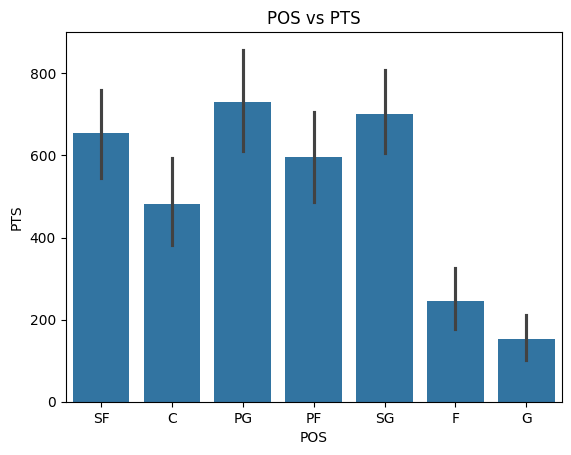

In [5]:
ax = sns.barplot(x= 'POS', y = 'PTS', data = df)
ax.set_title('POS vs PTS')

Vemos mucha variabilidad en la media de puntos anotados dependiendo de la posición del jugador. Esta puede ser una buena variable para predecir la variable objetivo.

Veamos la relación entre los tiros intentados y los puntos.

Text(0.5, 0.98, 'FGA vs PTS')

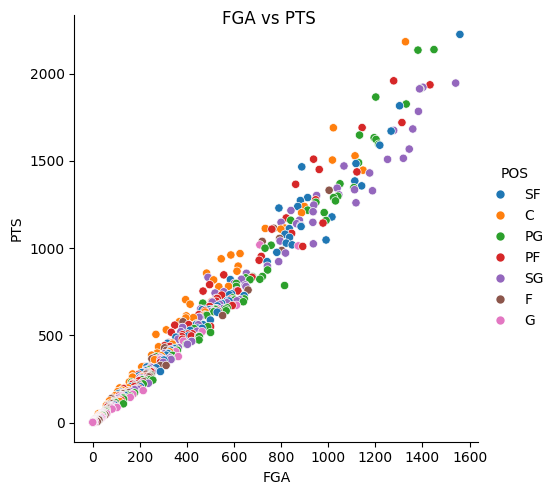

In [6]:
ax = sns.relplot(x = 'FGA', y = 'PTS', data = df, hue = 'POS')
ax.fig.suptitle('FGA vs PTS')

'You Miss 100% of the Shots You Don't Take' -Wayne Gretzky

En el baloncesto, uno de los momentos que suelen definir los partidos son los tiros libres. Estos son lanzamientos sin oposición desde una distancia definida, otorgados como penalización al equipo contrario tras cometer algún tipo de falta. Veamos si el porcentaje de tiros libres acertados influye en los puntos.

Text(0.5, 0.98, 'FGA vs PTS')

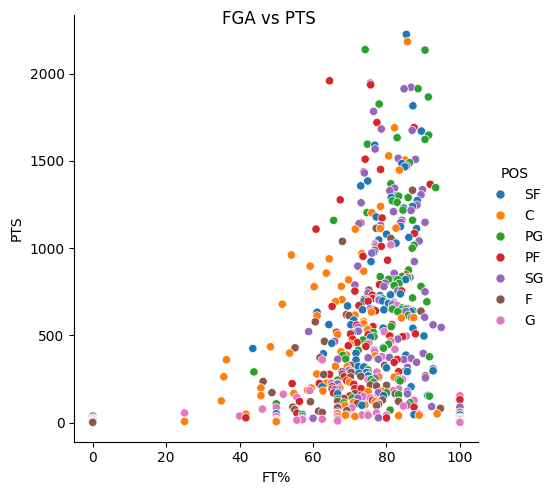

In [7]:
ax = sns.relplot(x = 'FT%', y = 'PTS', data = df, hue = 'POS')
ax.fig.suptitle('FGA vs PTS')

Esta variable esta mucho más dispersa pero es interesante ver como las personas que tienen 100% no tienen tantos puntos, nos dice que no lo han intentado lo suficiente como para fallar.

<Axes: xlabel='Min', ylabel='Count'>

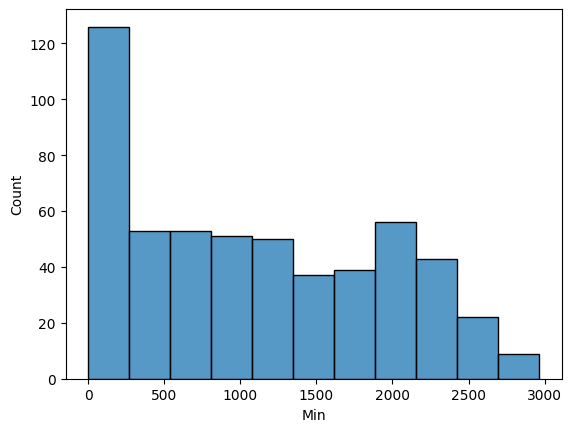

In [8]:
sns.histplot(x='Min', data = df)

A través de esta gráfica y la interpretación de la información general que nos proporcionó el analisis rápido del dataset, nos damos cuenta que existe una gran cantidad de jugadores que no jugaron ni siquiera 1/4 de la temporada y mueven nuestros datos de manera significativa.

## Limpieza de datos

### Filtrado de jugadores

Para eliminar este sesgo, vamos a eliminar a ciertos jugadores que no cumplan cierto requisito de minutos jugados en la temporada:
Una temporada se compone de 82 juegos, cada uno de 48 minutos, si hacemos el cálculo: $$48 \text{ minutos} * 82\text{ partidos} =3936\text{ minutos totales}$$

En este caso solo vamos a considerar jugadores que participaron en al menos $\frac{1}{4}$ de la temporada, esto constaría en que un jugador tendría que tener al menos **984** minutos totales.

In [9]:
df_r = df[df["Min"] > 984]

In [10]:
print(f"Este filtro de jugadores nos quitó {df.shape[0] - df_r.shape[0]} columnas")

Este filtro de jugadores nos quitó 272 columnas


Una vez aplicado el filtro, separaremos los datos en entrenamiento y prueba.

In [11]:
#Tambien eliminare el nombre del jugador y el equipo para evitar el sobreajuste
X = df_r.drop(['PTS', 'PName', 'Team'], axis = 1)
y = df_r['PTS']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=444)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((213, 27), (213,), (54, 27), (54,))

Exploración de datos:

In [14]:
X_train.isna().sum()

POS     0
Age     0
GP      0
W       0
L       0
Min     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
TOV     0
STL     0
BLK     0
PF      0
FP      0
DD2     0
TD3     0
+/-     0
dtype: int64

No tenemos valores nulos después de haber aplicado nuestro filtro.

Como no tenemos datos nulos, podemos seguir con la preparación. Se utilizará un LabelEncoder para la posición.

In [15]:
le = LabelEncoder()

In [16]:
X_train['POS'] = le.fit_transform(X_train['POS'])
X_test['POS'] = le.fit_transform(X_test['POS'])

Veamos si tenemos datos atípicos en el dataset.

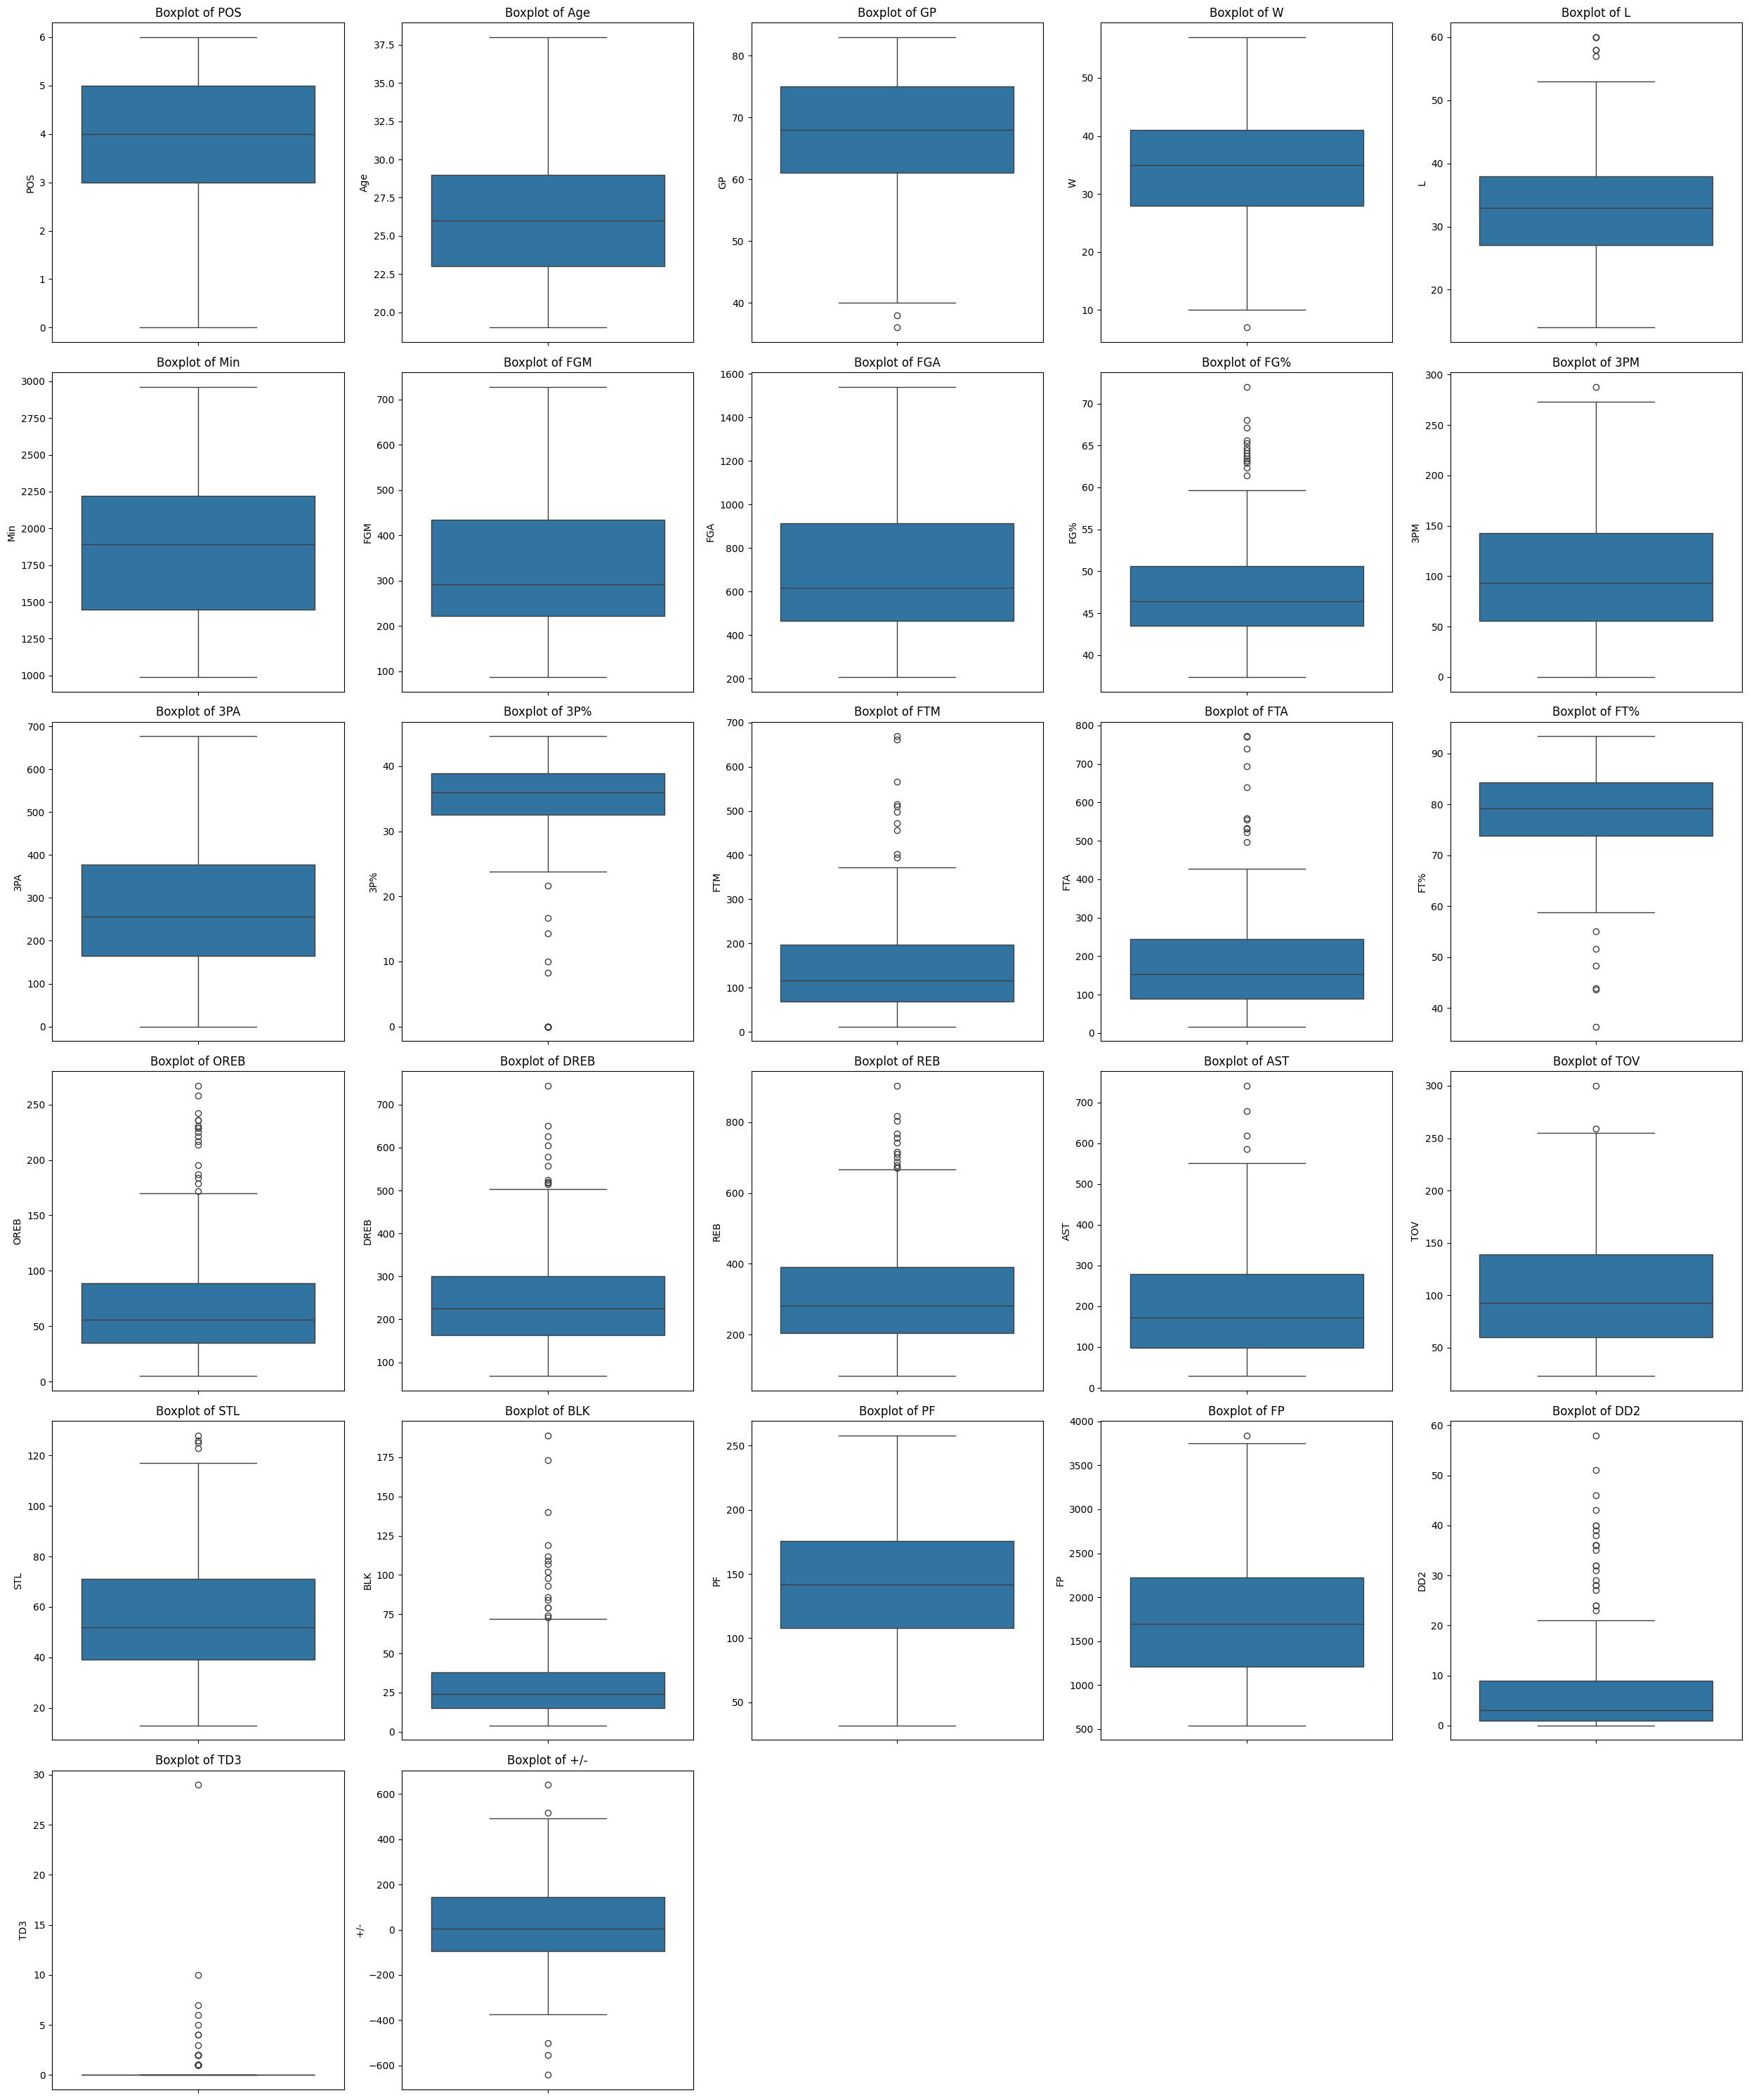

In [17]:
#Función creada para el gráfico de boxplots
def plot_boxplots(df):
    num_columns = df.shape[1]
    ncols = 5  
    nrows = math.ceil(num_columns / ncols)  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()  

    for i, col in enumerate(df.columns):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots(X_train)

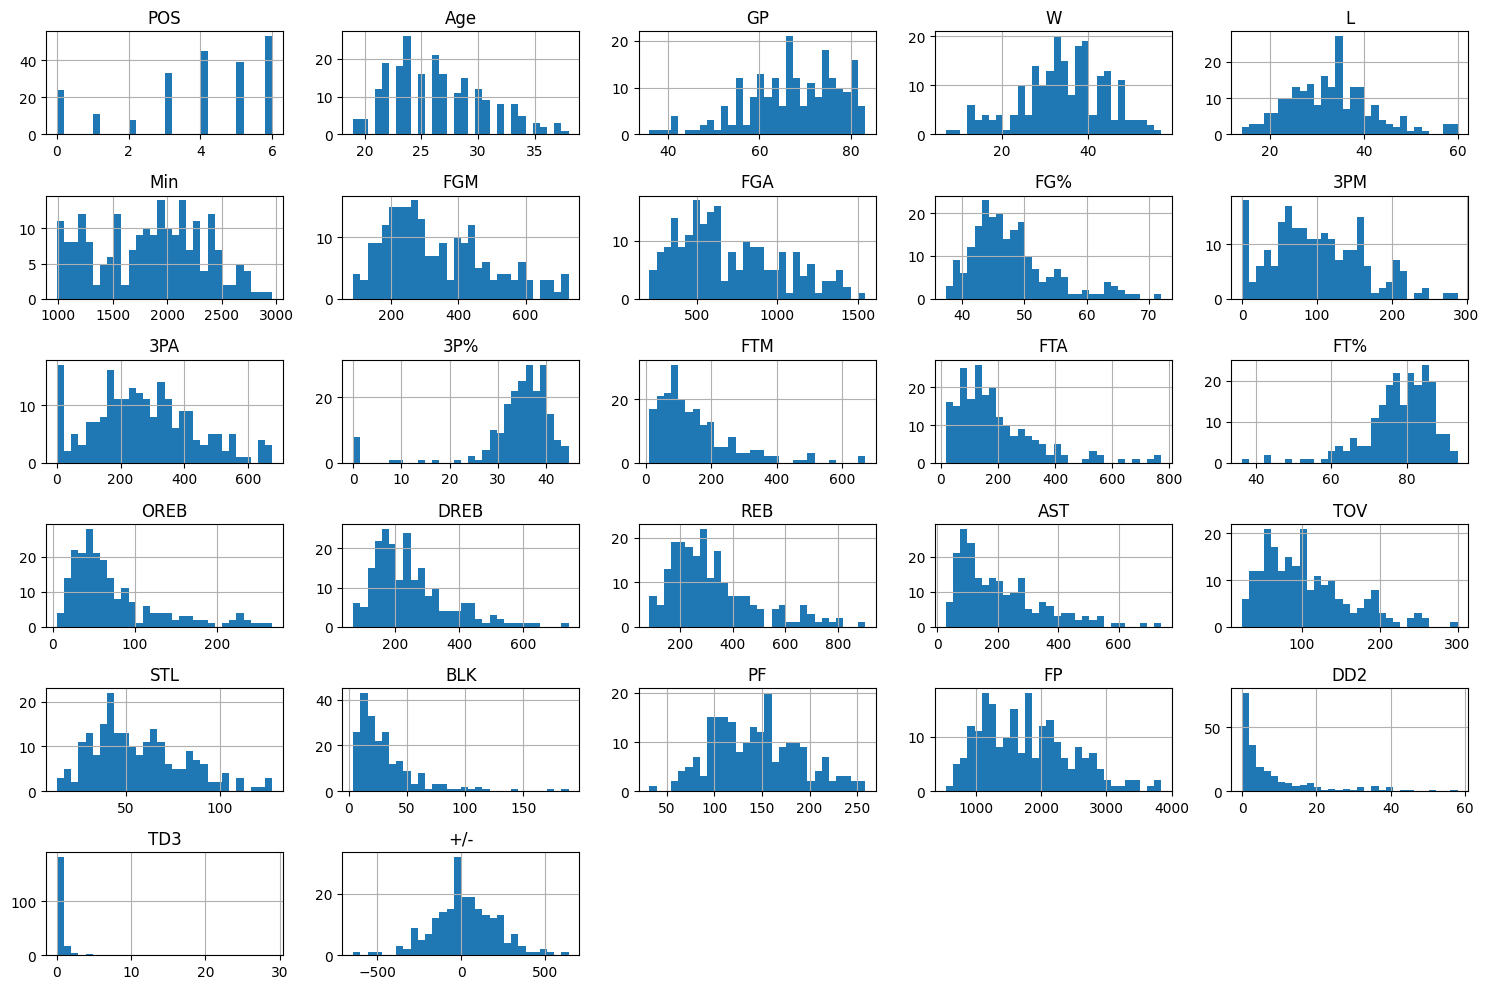

In [18]:
X_train.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Vemos distribuciones de todo tipo aunque, la mayoria tiene un sesgo a la derecha. Es necesario que corrijamos esto para mejorar el desempeño de nuestro modelo de regresión.

 Sin embargo, tenemos muchas features todavia y puede que algunas no nos sirvan de mucho para conseguir el resultado de la variable objetivo, veamos cuales son las más útiles.

In [19]:
co= X_train.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,POS,Age,GP,W,L,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
POS,1.00,0.03,0.06,0.09,-0.03,0.14,0.04,0.17,-0.50,0.46,0.46,0.42,-0.00,-0.05,0.35,-0.59,-0.44,-0.52,0.19,0.03,0.28,-0.45,-0.22,-0.06,-0.47,-0.10,0.08
Age,0.03,1.00,-0.16,0.12,-0.31,-0.00,-0.02,-0.01,-0.12,0.16,0.12,0.16,0.03,-0.00,0.17,-0.16,-0.00,-0.06,0.14,-0.01,-0.04,-0.15,-0.18,0.02,0.02,0.03,0.24
GP,0.06,-0.16,1.00,0.59,0.47,0.58,0.21,0.23,-0.02,0.19,0.21,0.07,0.06,0.07,0.05,0.23,0.31,0.31,0.10,0.15,0.32,0.18,0.48,0.28,0.07,-0.04,0.04
W,0.09,0.12,0.59,1.00,-0.44,0.37,0.17,0.16,-0.00,0.22,0.20,0.15,0.06,0.06,0.07,0.06,0.22,0.18,0.12,0.07,0.21,0.09,0.18,0.22,0.10,0.08,0.64
L,-0.03,-0.31,0.47,-0.44,1.00,0.24,0.05,0.08,-0.02,-0.03,0.01,-0.09,0.00,0.01,-0.02,0.20,0.11,0.15,-0.02,0.09,0.13,0.11,0.34,0.08,-0.03,-0.13,-0.66
Min,0.14,-0.00,0.58,0.37,0.24,1.00,0.77,0.80,-0.05,0.51,0.54,0.08,0.58,0.57,0.29,0.20,0.53,0.45,0.56,0.66,0.59,0.19,0.55,0.82,0.35,0.13,0.24
FGM,0.04,-0.02,0.21,0.17,0.05,0.77,1.00,0.97,0.13,0.44,0.48,0.05,0.82,0.82,0.28,0.17,0.57,0.48,0.60,0.82,0.43,0.19,0.34,0.94,0.53,0.28,0.28
FGA,0.17,-0.01,0.23,0.16,0.08,0.80,0.97,1.00,-0.11,0.59,0.64,0.15,0.79,0.77,0.37,0.00,0.45,0.33,0.65,0.82,0.46,0.06,0.30,0.89,0.40,0.22,0.23
FG%,-0.50,-0.12,-0.02,-0.00,-0.02,-0.05,0.13,-0.11,1.00,-0.54,-0.59,-0.50,0.11,0.18,-0.46,0.68,0.43,0.55,-0.15,0.01,-0.14,0.54,0.19,0.19,0.42,0.14,0.11
3PM,0.46,0.16,0.19,0.22,-0.03,0.51,0.44,0.59,-0.54,1.00,0.99,0.55,0.26,0.20,0.51,-0.45,-0.05,-0.19,0.35,0.33,0.29,-0.28,0.01,0.35,-0.11,0.00,0.20


Existen correlaciones muy fuertes entre las variables, lo siguiente es reducir la dimensionalidad a través de eliminar aquellas relaciones que tengan un Threshold mayor a 0.6

In [20]:
#Funciones del notebook: FeatureSelection.ipynb por Sara Eugenia Rodriguez Reyes
def calcDrop(res):
    # Obtener todas las variables con una correlacion  > 0.6
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # Todas las variables únicas en las columnas a remover
    poss_drop = list(set(res['drop'].tolist()))

    # Quedarse con las variables que no estén en las variables a remover
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop
def corrX_new(df, cut=0.6):
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis=1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = list()
    results = []
    
    for row in range(len(up) - 1):
        col_idx = row + 1
        for col in range(col_idx, len(up)):
            if corr_mtx.iloc[row, col] > cut:
                if avg_corr.iloc[row] > avg_corr.iloc[col]: 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([corr_mtx.index[row],
                               up.columns[col],
                               avg_corr[row],
                               avg_corr[col],
                               up.iloc[row, col],
                               drop],
                              index=['v1', 'v2', 'v1.target', 'v2.target', 'corr', 'drop'])
        
                results.append(s)
    
    # Concatenate all collected Series into a DataFrame
    res = pd.concat(results, axis=1).T.reset_index(drop=True)
    
    dropcols_names = calcDrop(res)
    
    return dropcols_names

drop = corrX_new(X_train)
print(drop)

['FTA', 'DREB', 'FGA', 'FP', 'OREB', 'REB', '+/-', '3PA', 'TOV', 'FGM']


C:\Users\Rafa\AppData\Local\Temp\ipykernel_12648\1686929084.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[row],
C:\Users\Rafa\AppData\Local\Temp\ipykernel_12648\1686929084.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[col],


Vemos que esta función eliminó 15 columnas en total, analizemos otra vez las correlaciones.

In [21]:
co_post= X_train.drop(drop, axis = 1).corr()
co_post.style.background_gradient(cmap='coolwarm').format(precision=2)

,POS,Age,GP,W,L,Min,FG%,3PM,3P%,FTM,FT%,AST,STL,BLK,PF,DD2,TD3
POS,1.00,0.03,0.06,0.09,-0.03,0.14,-0.50,0.46,0.42,-0.00,0.35,0.19,0.28,-0.45,-0.22,-0.47,-0.10
Age,0.03,1.00,-0.16,0.12,-0.31,-0.00,-0.12,0.16,0.16,0.03,0.17,0.14,-0.04,-0.15,-0.18,0.02,0.03
GP,0.06,-0.16,1.00,0.59,0.47,0.58,-0.02,0.19,0.07,0.06,0.05,0.10,0.32,0.18,0.48,0.07,-0.04
W,0.09,0.12,0.59,1.00,-0.44,0.37,-0.00,0.22,0.15,0.06,0.07,0.12,0.21,0.09,0.18,0.10,0.08
L,-0.03,-0.31,0.47,-0.44,1.00,0.24,-0.02,-0.03,-0.09,0.00,-0.02,-0.02,0.13,0.11,0.34,-0.03,-0.13
Min,0.14,-0.00,0.58,0.37,0.24,1.00,-0.05,0.51,0.08,0.58,0.29,0.56,0.59,0.19,0.55,0.35,0.13
FG%,-0.50,-0.12,-0.02,-0.00,-0.02,-0.05,1.00,-0.54,-0.50,0.11,-0.46,-0.15,-0.14,0.54,0.19,0.42,0.14
3PM,0.46,0.16,0.19,0.22,-0.03,0.51,-0.54,1.00,0.55,0.26,0.51,0.35,0.29,-0.28,0.01,-0.11,0.00
3P%,0.42,0.16,0.07,0.15,-0.09,0.08,-0.50,0.55,1.00,0.02,0.57,0.13,0.08,-0.36,-0.19,-0.30,0.02
FTM,-0.00,0.03,0.06,0.06,0.00,0.58,0.11,0.26,0.02,1.00,0.31,0.56,0.33,0.16,0.27,0.47,0.27


Ya no están tan correlacionadas las variables como antes, esto nos viene perfecto para el entrenamiento de los modelos de regresión así que, con estas variables lo haremos.

In [22]:
X_train_nocorr = X_train.drop(drop, axis = 1)
X_train_nocorr.head()

,POS,Age,GP,W,L,Min,FG%,3PM,3P%,FTM,FT%,AST,STL,BLK,PF,DD2,TD3
76,6,22,59,18,41,2023.9,44.2,141,36.6,207,78.4,338,82,17,156,9,1
38,6,22,73,40,33,2475.5,43.4,121,31.0,290,74.0,201,31,15,179,3,0
124,4,37,59,33,26,1888.6,44.0,98,37.5,133,83.1,524,91,22,126,17,0
96,2,24,74,36,38,2272.4,38.8,135,33.0,200,77.2,154,75,23,243,5,0
16,0,28,69,48,21,2323.0,63.2,57,38.3,341,82.2,678,87,47,174,58,29


In [23]:
X_test_nocorr = X_test.drop(drop, axis=1)

Por último, veamos si quedaron algunos outliers en las variables que seleccionamos.

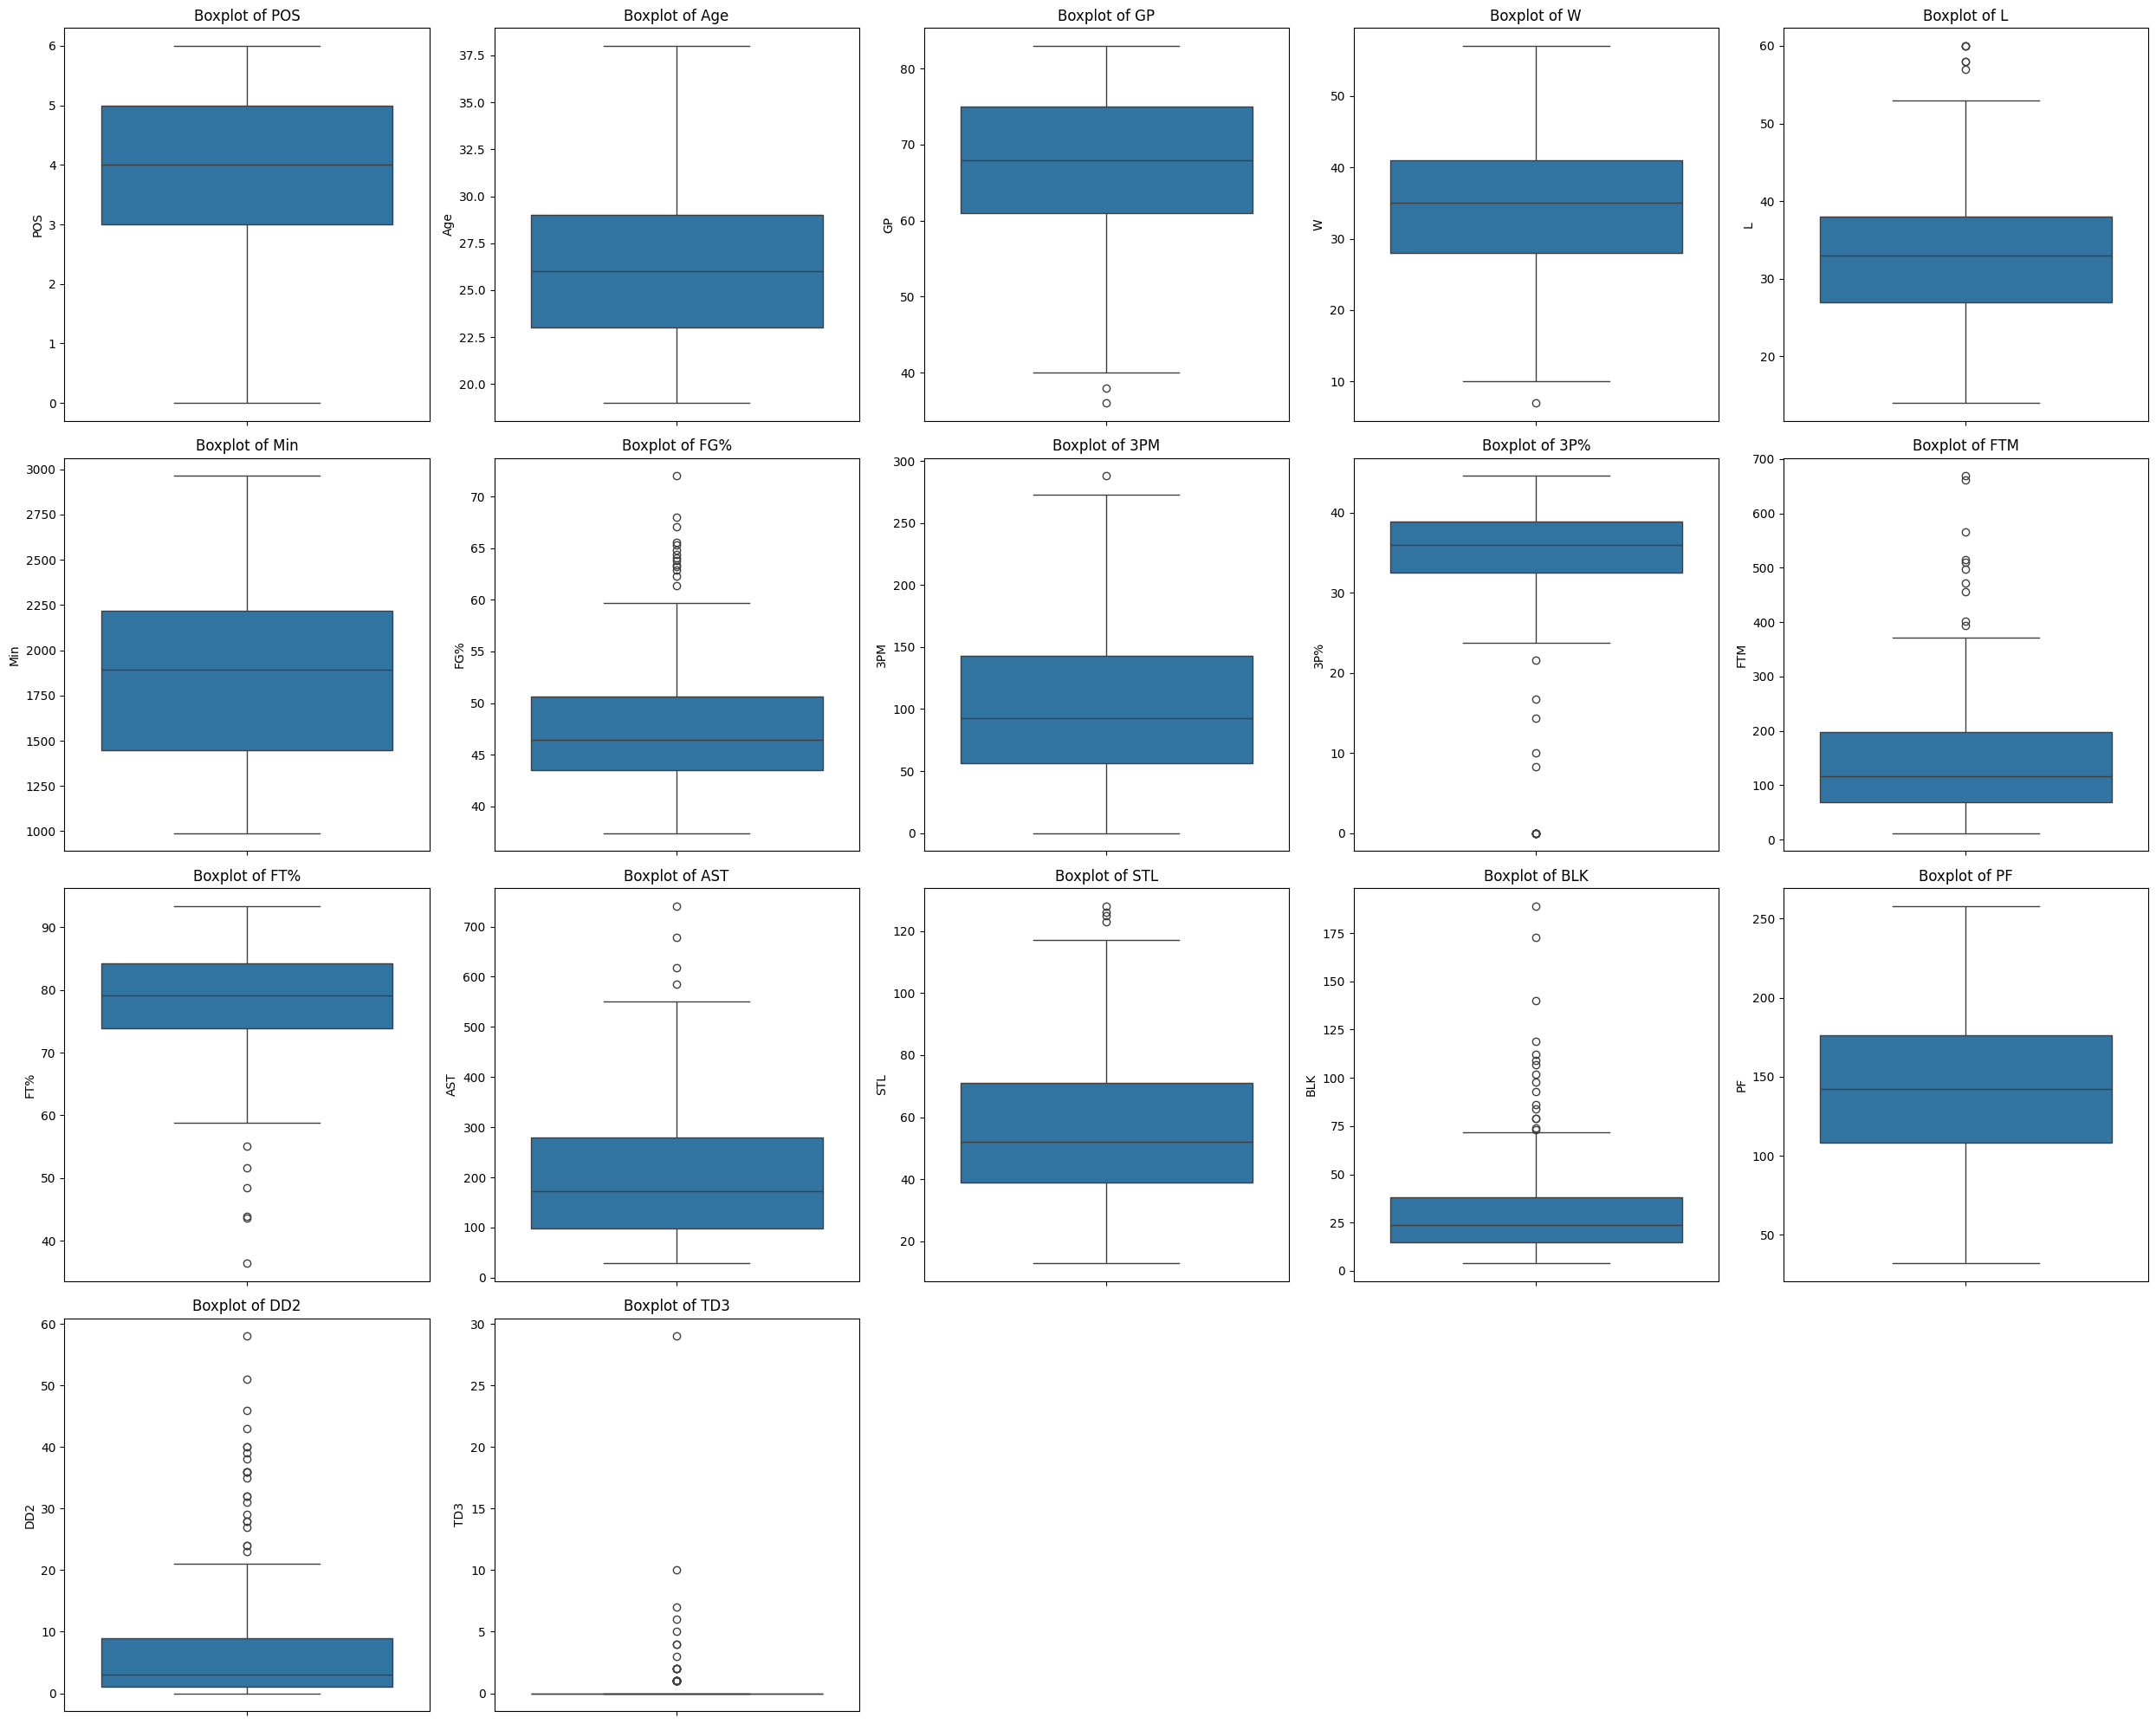

In [24]:
plot_boxplots(X_train_nocorr)

## Modelado para regresión:

### Predicciones iniciales

#### Normalización y Estandarización

Al hacer un pequeño análisis de nuestros datos, podemos caer en cuenta que contamos con una cantidad considerable de datos atípicos y algunos distribuciones no normales. Dado que los arboles de decisión pueden trabajar con cualquier tipo de distriubución y con datos atípicos, yo creo que el XGBOOST va a ser el modelo que mejor rendimiento nos va a dar. Aún asi, vamos a calarle con 4 modelos diferentes:
- Regresión Lineal
- Suppor Vector Machine
- XGBOOST
- Random Forest

### Métodos de evaluación de modelos

Para cada uno de los modelos vamos a utilizar las siguientes dos métricas:
- R2 (Esto debido a la interpretabilidad que tiene esta métrica, es muy fácil de entender que tan bien está funcionando el modelo e incluso si está sobreajustando)
- MAE (En este escenario no nos interesa tanto penalizar los errores grandes, para nosotros es igual si el modelo falla por 50 o si falla por 2)

Para poder maximizar los rendimientos de algunos modelos como Regresión Lineal y SVM, vamos a estandarizar y normalizar los datos, aunque mantendremos la data original para el resto de los modelos.

Las bibliotecas que usaremos para evaluar el desempeño de los modelos son:

In [25]:
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [26]:
scaler = StandardScaler()
norm = Normalizer()

X_train_st = scaler.fit_transform(X_train_nocorr)
X_train_nm = norm.fit_transform(X_train_nocorr)

X_test_st = scaler.fit_transform(X_test_nocorr)
X_test_nm = norm.fit_transform(X_test_nocorr)

In [27]:
X_test_st_df = pd.DataFrame(X_test_st, columns= X_test_nocorr.columns)
X_train_st_df = pd.DataFrame(X_train_st, columns=X_train_nocorr.columns)
X_test_nm_df = pd.DataFrame(X_test_nm, columns=X_train_nocorr.columns)
X_train_nm_df = pd.DataFrame(X_train_nm, columns=X_train_nocorr.columns)

### Support Vector Machine (SVM)

Para el SVM vamos a usar los datos normalizados. Esto ya que SVM es un modelo que saca sus predicciones a partir de distancias, estamos buscando que todos los datos queden en el intervalo $[0,1]$

In [28]:
from sklearn.svm import SVR

In [29]:
parametros_svm = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": [0.01, 1, 1],
    "gamma" : ["scale", "auto", 0.005, 0.05, 0.5, 5]
}

svm = SVR()

grid = GridSearchCV(estimator= svm, param_grid= parametros_svm, scoring="neg_mean_absolute_error", cv=4 , verbose=1, error_score="raise")
grid.fit(X_train_nm_df, y_train)


Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, error_score='raise', estimator=SVR(),
             param_grid={'C': [0.01, 1, 1],
                         'gamma': ['scale', 'auto', 0.005, 0.05, 0.5, 5],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_absolute_error', verbose=1)

In [30]:
print(f"Los mejores parámetros fueron {grid.best_params_}")

Los mejores parámetros fueron {'C': 1, 'gamma': 5, 'kernel': 'poly'}


In [31]:
svr_tuneado = SVR(kernel="poly", C=100, gamma=5)
svr_tuneado.fit(X_train_nm_df, y_train)

SVR(C=100, gamma=5, kernel='poly')

In [32]:
y_hat = svr_tuneado.predict(X_test_nm_df)
r2_svm = metrics.r2_score(y_test, y_hat)
mae_svm = metrics.mean_absolute_error(y_test,  y_hat)

print(f"R2: {r2_svm}")
print(f"mae: {mae_svm}")

R2: 0.8886726416784003
mae: 113.72060378363838


### Regresión Lineal

Para regresión lineal usaremos los datos estandarizados, esto debido a que como la regresión lineal intenta trazar una linea que mejor represente el promedio de los datos. Si tenemos un dato que se sale por mucho de los datos en general, esto nos puede causar bastantes problemas en los resultados.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
LR = LinearRegression()
LR.fit(X_train_st_df, y_train)

y_hat = LR.predict(X_test_st_df)

In [35]:
r2 = metrics.r2_score(y_test, y_hat)
mae = metrics.mean_absolute_error(y_test,y_hat)

print(f"R2: {r2}")
print(f"mse: {mae}")

R2: 0.9391534011126567
mse: 87.69376558144168


Podemos ver unas métricas bastante buenas, en donde la R2 nos da de 0.93 y el error promedio es de 87 (lo cual es bastante bueno).

### XGBOOST

El XGBOOST es un modelo basado en árboles, con esta información podemos saber que no hace falta hacerle alguna estandarización o normalización a los datos para que jale bien (de hecho intentamos pasarle los datos normalizados y estandarizados y nos dio unas métricas horribles)

In [36]:
import xgboost as xgb

In [37]:
model = xgb.XGBRegressor(objective= "reg:squarederror", seed=45)
model.fit(X_train_nocorr, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Sin tuneo de hiperparámetros

In [38]:
y_hat = model.predict(X_test_nocorr)

r2_nt = metrics.r2_score(y_test, y_hat)
mse_nt = metrics.mean_absolute_error(y_test, y_hat)

print(f"r2: {r2_nt}")
print(f"mse: {mse_nt}")

r2: 0.8964798450469971
mse: 104.08044772677951


#### Tuneo de hiperparámetros

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


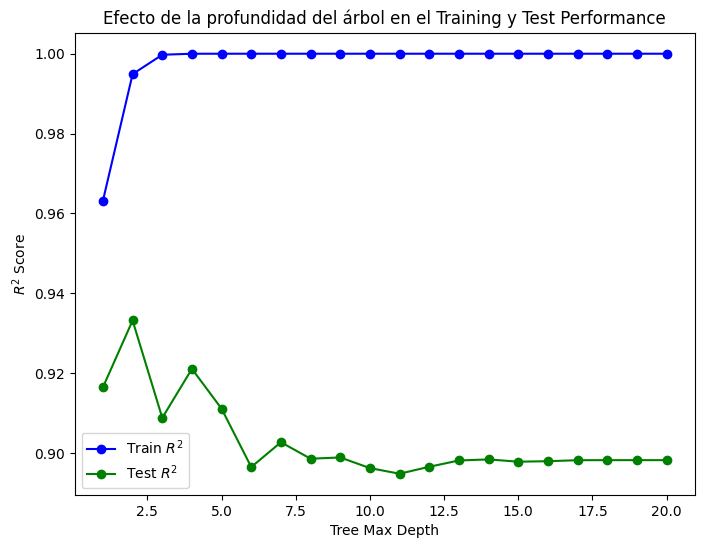

In [39]:
max_depth = range(1, 21)
train_scores = []
test_scores = list()

for depth in max_depth:
    xg_reg = xgb.XGBRegressor(max_depth= depth, objective="reg:squarederror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depth, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()
    

Para el hiperparámetro **max_depth** utilizaremos los valores $[2, 3, 4]$

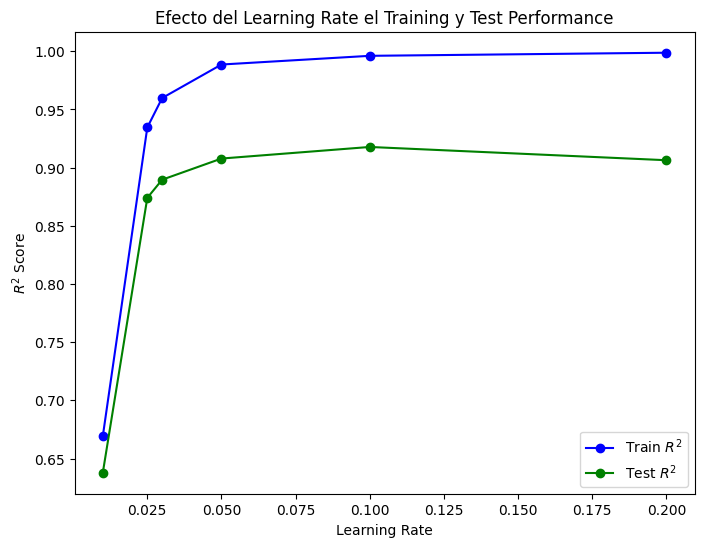

In [40]:
eta = [0.01, 0.025, 0.03, 0.05, 0.1, 0.2]
train_scores = []
test_scores = list()

for value in eta:
    xg_reg = xgb.XGBRegressor(learning_rate= value, objective="reg:absoluteerror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(eta, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(eta, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del Learning Rate el Training y Test Performance')
plt.legend()
plt.show()

Para el parametro **learning_rate** utilizaremos los valores $[0.02, 0.025, 0.03]$

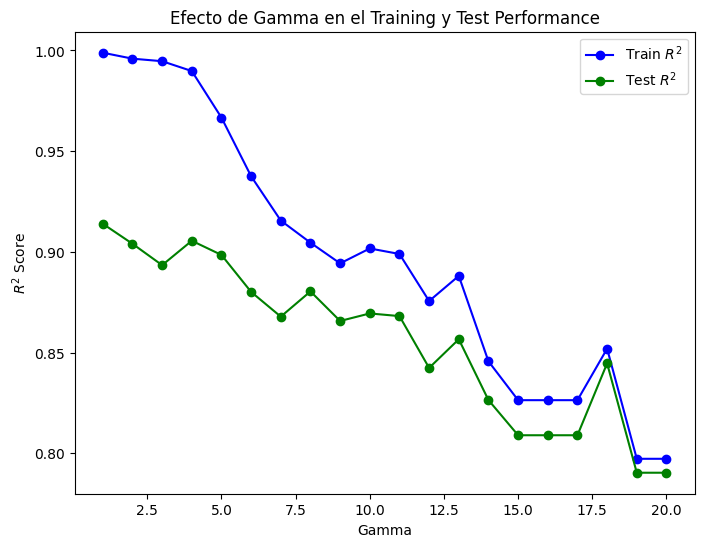

In [41]:
gammas = range(1, 21)
train_scores = []
test_scores = list()

for gamma in gammas:
    xg_reg = xgb.XGBRegressor(gamma= gamma, objective="reg:absoluteerror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(gammas, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(gammas, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Gamma')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de Gamma en el Training y Test Performance')
plt.legend()
plt.show()

En el hiperparámetro **Gamma** eligiremos los valores $[4, 4.5, 5]$

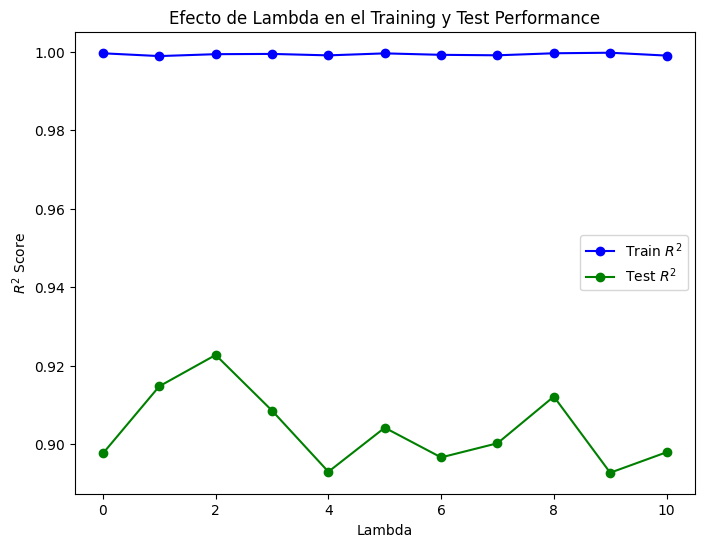

In [42]:
lambdas = range(0, 11)
train_scores = []
test_scores = list()

for lambd in lambdas:
    xg_reg = xgb.XGBRegressor(reg_lambda= lambd, objective="reg:absoluteerror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(lambdas, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Lambda')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de Lambda en el Training y Test Performance')
plt.legend()
plt.show()


**Lambda**: $[1, 2, 3]$

In [43]:
gxb_param = {"reg_lambda": [1,2,3],
             "gamma": [4, 4.5, 5],
             "learning_rate": [0.02, 0.025, 0.03],
             "max_depth": [2, 3, 4]}

gxb = xgb.XGBRegressor(objective="reg:absoluteerror", seed= 22)

grid = GridSearchCV(estimator= gxb, param_grid= gxb_param, scoring="neg_mean_absolute_error", cv=4, verbose=1)

grid.fit(X_train_nocorr, y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:absoluteerror', ...),
             param_grid={'gamma': [4, 4.5, 5],
                         'learning_rate': [0.02, 0.025, 0.03],
                         'max_depth': [2, 3, 4], 'reg_lambda': [1, 2, 3]},
             scoring='neg_mean_absolute_error', verbose=1)

In [44]:
print(f"Los mejores parámetros fueron {grid.best_params_}")

Los mejores parámetros fueron {'gamma': 4.5, 'learning_rate': 0.03, 'max_depth': 4, 'reg_lambda': 1}


#### Evaluación XGBOOST con hiperparámetros seleccionados

In [45]:
nuevo_xgb = xgb.XGBRegressor(objective="reg:absoluteerror", gamma=4.5, learning_rate=0.03, max_depth=4, reg_lambda=1)

nuevo_xgb.fit(X_train_nocorr, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=4.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [46]:
y_hat_nuevo = nuevo_xgb.predict(X_test_nocorr)

r2_xgb = metrics.r2_score(y_test, y_hat_nuevo)
mae_xgb = metrics.mean_absolute_error(y_test, y_hat_nuevo)

print(f"EL nuevo score R2: {r2_xgb}")
print(f"El nuevo score mae: {mae_xgb}")

EL nuevo score R2: 0.8915413618087769
El nuevo score mae: 101.4000165020978


### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor  

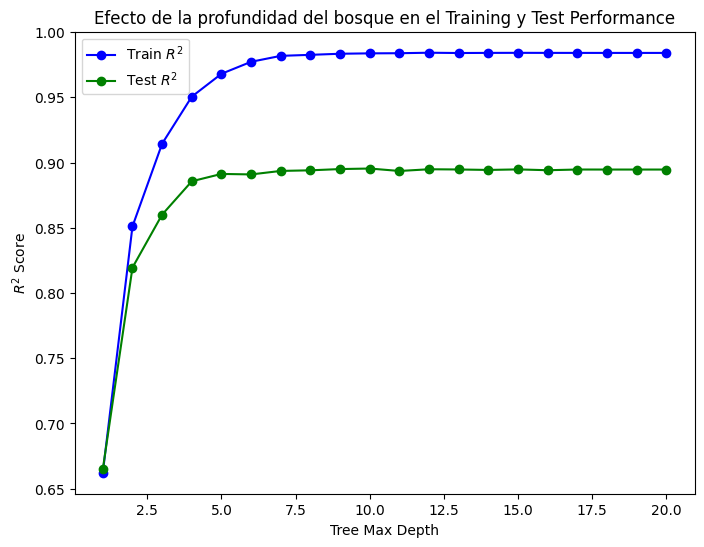

In [48]:
max_depth = range(1,21)
train_scores = []
test_scores = []

for depth in max_depth:
    tree = RandomForestRegressor(max_depth=depth, random_state=22)
    tree.fit(X_train_nocorr, y_train)
    train_scores.append(tree.score(X_train_nocorr, y_train))
    test_scores.append(tree.score(X_test_nocorr, y_test))

plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depth, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

Para **max_depth** los valores que usaremos son: $[4, 5, 6]$

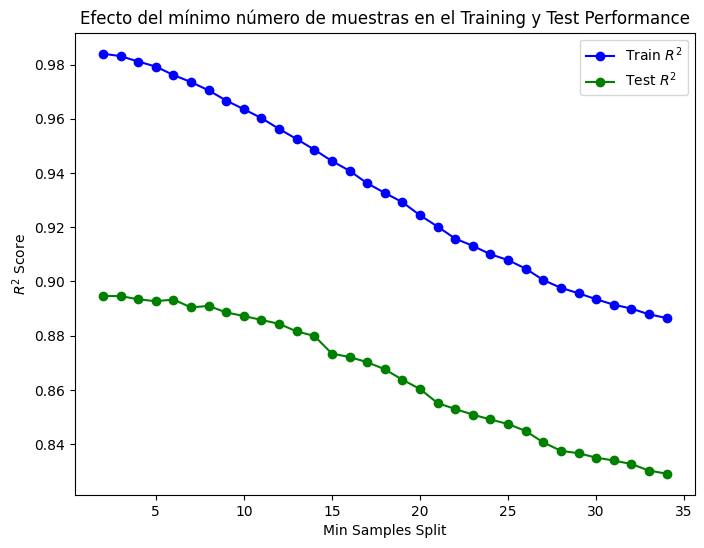

In [49]:
min_samples = range(2, 35)
train_scores = list()
test_scores = list()

for sample in min_samples:
    tree = RandomForestRegressor(min_samples_split=sample, random_state=22)
    tree.fit(X_train_nocorr, y_train)
    train_scores.append(tree.score(X_train_nocorr, y_train))
    test_scores.append(tree.score(X_test_nocorr, y_test))


plt.figure(figsize=(8, 6))
plt.plot(min_samples, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(min_samples, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del mínimo número de muestras en el Training y Test Performance')
plt.legend()
plt.show()

La gráfica de **min_samples_split** está un poco rara, ya que no existen valores muy obvios, lo intentaremos con los siguientes valores: $[2, 3, 4, 5, 6]$

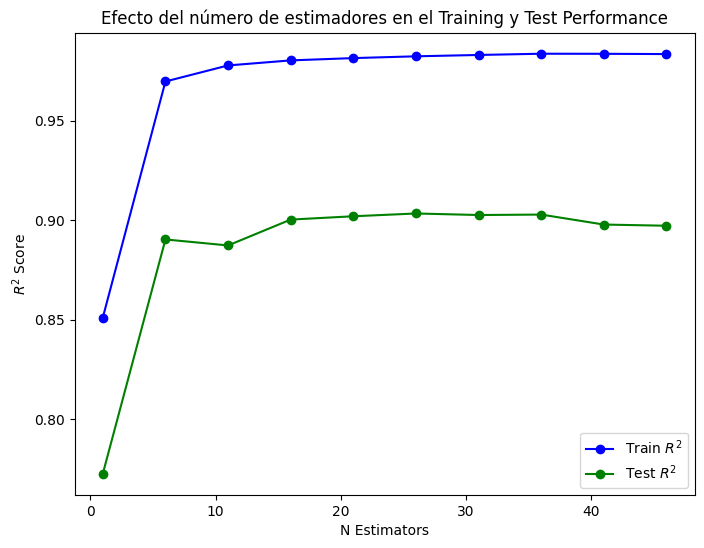

In [50]:
estimators = range(1,50, 5)
train_scores = []
test_scores = []

for estimator in estimators:
    tree = RandomForestRegressor(n_estimators=estimator, random_state=22)
    tree.fit(X_train_nocorr, y_train)
    train_scores.append(tree.score(X_train_nocorr, y_train))
    test_scores.append(tree.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(estimators, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(estimators, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('N Estimators')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del número de estimadores en el Training y Test Performance')
plt.legend()
plt.show()

Para **n_estimators**, los valores óptimos son: $[6, 7, 8]$

In [51]:
rf_param = { "n_estimators": [6,7,8],
             "min_samples_split": [2, 3, 4, 5, 6],
             "max_depth": [4, 5, 6]}

rfr = RandomForestRegressor(criterion="absolute_error", min_samples_leaf=2, bootstrap=True, oob_score=False, random_state= 22)

grid = GridSearchCV(estimator= rfr, param_grid= rf_param, scoring="neg_mean_absolute_error", cv=4, verbose=1)

grid.fit(X_train_nocorr, y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             min_samples_leaf=2,
                                             random_state=22),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [6, 7, 8]},
             scoring='neg_mean_absolute_error', verbose=1)

In [52]:
print(f"Los mejores parámetros para el Random Forest son {grid.best_params_}")

Los mejores parámetros para el Random Forest son {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 8}


In [53]:
rfr_nuevo = RandomForestRegressor(criterion="absolute_error", min_samples_leaf=2, max_depth=5, min_samples_split=6, 
                                  n_estimators=8, bootstrap=True, oob_score=False, random_state=22)
rfr_nuevo.fit(X_train_nocorr, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=2, min_samples_split=6, n_estimators=8,
                      random_state=22)

In [54]:
y_hat_nuevo = rfr_nuevo.predict(X_test_nocorr)
r2_rfr = metrics.r2_score(y_test, y_hat_nuevo)
mae_rfr = metrics.mean_absolute_error(y_test, y_hat_nuevo)
print(f"R2: {r2_rfr}")
print(f"mae: {mae_rfr}")

R2: 0.891722010247175
mae: 108.98495370370371


### Comparación de rendimiento de modelos

Vamos a ver cómo nos fue con cada modelo y si nuestra predicción inicial fue acertada

In [55]:
print("SVM:")
print(f"R2: {r2_svm}, mae: {mae_svm} \n")
print("Linear Regression (Ridge):")
print(f"R2: {r2}, mae: {mae} \n")
print("XGBOOST:")
print(f"R2: {r2_xgb}, mae: {mae_xgb} \n")
print("Random Forest:")
print(f"R2: {r2_rfr}, mae: {mae_rfr}")

SVM:
R2: 0.8886726416784003, mae: 113.72060378363838 

Linear Regression (Ridge):
R2: 0.9391534011126567, mae: 87.69376558144168 

XGBOOST:
R2: 0.8915413618087769, mae: 101.4000165020978 

Random Forest:
R2: 0.891722010247175, mae: 108.98495370370371


La métrica que vamos a utilizar para rankear va a ser mae (esto debido a que nos interesa saber por cuantos puntos en promedio erró cada modelo). El ranking fue el siguiente:
1. Linear Regression (Ridge) - 87.69 puntos promedio
2. XGBOOST - 101.4 puntos promedio
3. Random Forest - 108.98 puntos promedio
4. SVM - 113.72 puntos promedio

### Probar con datos nuevos

Vamos a crearnos un conjunto de datos totalmente nuevos, unos que el modelo no haya visto antes, esto con el objetivo de ver cuál sería el comportamiento del modelo dado datos que jamás ha visto

In [56]:
data = [[6, 32, 82, 72, 10, 3090, 49.5, 111, 42.7, 548, 83.4, 352, 180, 42, 195, 12, 0],
        [4, 27, 79, 73, 9, 2700, 50.4, 402, 45.4, 363, 90.8, 527, 169, 15, 161, 12, 2]]
new_data = pd.DataFrame(data=data, columns=X_train_nocorr.columns)
new_data

,POS,Age,GP,W,L,Min,FG%,3PM,3P%,FTM,FT%,AST,STL,BLK,PF,DD2,TD3
0,6,32,82,72,10,3090,49.5,111,42.7,548,83.4,352,180,42,195,12,0
1,4,27,79,73,9,2700,50.4,402,45.4,363,90.8,527,169,15,161,12,2


In [57]:
scaler.fit(X_train_nocorr) #Importante entrenar los datos con el conjunto que ya teníamos, ya que si entrenamos con el conjunto nuevo se va aestandarizar muy mal
new_data_st = scaler.transform(new_data)
df_new_data= pd.DataFrame(new_data_st, columns= new_data.columns)
df_new_data

,POS,Age,GP,W,L,Min,FG%,3PM,3P%,FTM,FT%,AST,STL,BLK,PF,DD2,TD3
0,1.116204,1.317743,1.473801,3.810880,-2.524657,2.553582,0.253014,0.186631,1.023786,3.383128,0.593112,1.044052,5.05507,0.363148,1.133168,0.392043,-0.199535
1,0.080250,0.124379,1.176716,3.911814,-2.635033,1.755289,0.392993,4.929527,1.342268,1.810902,1.408092,2.303096,4.60392,-0.614598,0.384408,0.392043,0.685903


Una vez ya transformamos los datos para que estén de la manera adecuada, vamos a calar el modelo que habíamos entrenado previamente

In [58]:
y_hat_2 = LR.predict(df_new_data)

print(f"Los puntos esperados para el jugador 1 son de {y_hat_2[0]}")
print(f"Los puntos esperados para el jugador 2 son de {y_hat_2[1]}")

Los puntos esperados para el jugador 1 son de 2037.6958281648153
Los puntos esperados para el jugador 2 son de 2230.289640596823


Yo decidí importar los datos de 2 de las mejores temporadas individuales de la historia:
1. Michael Jordan (1995 - 1996) quien terminó con un total de 2491 puntos
2. Stephen Curry (2015 - 2016) quien terminó con un total de 2375

En esta ocasión si sabemos cual es el resultado esperado, pero asumiendo que no supieramos cual es el resultado final, el modelo nos da una métrica bastante aceptable, no errando por tantos puntos. 

### Conclusiones (Regresión)

Creo que en este escenario todos los modelos elegidos fueron bastantes aptos a predecir los puntos que un jugador va a convertir en una temporada, ya que en general las métricas de todos los modelos fueron buenas. Aún así, hablaremos un poco de cada uno de los modelos que seleccionamos:

**Regresión Lineal** - Este modelo es muy sencillo de utilizar, casi casi es nomas .fit y .predict. Este modelo puede ser muy util cuando los datos cumplen características muy específicas, en este caso esas características se cumplieron y por eso el buen resultado del modelo. Otra ventaja de la regresión lineal es que es muy fácil de interpretar sus resultados. La desventaja es que no son buenos modelando relaciones muy complejas, casi casi que si la relación no es lineal, la regresión no va a ser tu mejor opción.

**SVM** - Los SVM son bastante buenos con problemas de alta dimensionalidad, esto dado a sus kernels y los hiperparámetros que nos permite tunear. Además es relativamente bueno cuando los datos no tienen una relación lineal. Lo malo de este modelo es que es de bastante costo computacional, además de que elegir los hiperparámetros puede ser algo complicado.

**XGBOOST** - Este modelo generalmente suele ser de los mejores, ya que tiende a tener una muy buena capacidad para generalizar datos nuevos. XGBOOST viene con varios features internos, los cuales nos ahorra, en ciertas ocasiones, muchísima chamba. En general tiende a ser un gran modelo para elegir. Lo malo de XGBOOST es que ajustar sus hiperparámetros puede ser algo tardado, además de que es muy poco interpretable y tiende a no ser tan bueno con conjuntos de datos pequeños.

**Random Forest** - Tiene muchas de las ventajas y desventajas similares a las del XGBOOST. El random forest es un modelo complejo al cual no se le necesita hacer mucho preprocessing a los datos para que jale, los random forests suelen ser bastantes buenos con datasets complejos. Son modelos muy confiables cuando se trata de representar relaciones complejas. Sus desventajas son que tienen un costo computacional bastante elevado, que son bastantes difíciles de interpretar y que tienden a sobreajustar en datasets pequeños. 

### Variables más importantes

In [59]:
importance = pd.DataFrame({
    "Feature": df_new_data.columns,
    "Coefficient": LR.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(importance)

   Feature  Coefficient
9      FTM   245.929003
5      Min   136.563073
7      3PM   130.878518
6      FG%    57.181870
15     DD2    41.004617
1      Age   -22.857708
14      PF   -19.698665
2       GP   -19.609743
3        W   -13.352489
11     AST    11.668683
4        L    -7.255382
0      POS     6.745581
12     STL    -5.275931
16     TD3     4.377868
13     BLK     4.350467
8      3P%     2.384797
10     FT%     2.144605


En esta lista, entre más grande sea el valor absoluto del coeficiente, mas importante es esa variable para el modelo.

Hace mucho sentido por qué las variables están en el orden en el que están. Si piensas cómo funciona la NBA y los puntos anotados en una temporada, puedes llegar a hacer las siguientes suposiciones:

- FTM - Los tiros libres metidos influyen directamente en tus puntos metidos en la temporada. Los jugadores que más puntos promedian, tienden a ser los mismos que más tiros libres metes.
- Min - Entre más minutos juegues, más oportunidades tendrás de meter puntos. Los jugadores que meten muchos puntos tienden a jugar muchos minutos
- 3PM - Los triples encestados impactan drásticamente tu total de puntos. 3 puntos es el máximo de puntos que un jugador puede encestar en una posesión.
- FG% - El porcentaje de tiro de un jugador implica que cantidad de sus tiros mete con respecto al los tiros que intenta.

La mayoría de las variables (pero en especial estas 4) tienen una relación lineal con la variable de puntos totales. Ya que en general, entre más sumas en estas 4 categorias, más puntos vas a terminar metiendo al final de la temporada.

# Clasificación

Para empezar la segunda parte del proyecto,  crearemos un modelo de clasificación que prediga la posición de un jugador de la NBA, primero debemos entender las características distintivas de cada posición en el baloncesto profesional. En la NBA, las posiciones principales son base (PG), escolta (SG), alero (SF), ala-pívot (PF), guardia (G), delantero pequeño (F) y pívot (C). Cada posición tiene un conjunto único de atributos físicos y habilidades en la cancha, como altura, peso, velocidad, precisión en el tiro, capacidad de rebote y habilidad para asistir. Estos rasgos son clave para un modelo de clasificación, ya que permiten diferenciar entre las posiciones basadas en las características y estadísticas individuales de cada jugador.

In [60]:
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [61]:
df.shape

(539, 30)

### Creación de X y Y

In [62]:
X_C = df_r.drop(['POS', 'PName', 'Team'], axis = 1)
Y_C = df_r['POS']

### Train Test Split

In [63]:
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, Y_C, test_size= 0.2, random_state=444, stratify= Y_C)

Sabemos que no hay datos faltantes ya que en la variable `df_r` no los hay.

De todas formas, corroboramos:

In [64]:
X_train_C.isna().sum()

Age     0
GP      0
W       0
L       0
Min     0
PTS     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
TOV     0
STL     0
BLK     0
PF      0
FP      0
DD2     0
TD3     0
+/-     0
dtype: int64

In [65]:
y_train_C.isna().sum()

0

### Ajuste en la variable objetivo

In [66]:
y_train_C.unique()

array(['PG', 'SG', 'PF', 'C', 'SF', 'G', 'F'], dtype=object)

Tenemos un problema multiclase, existen 7 posiciones a las que un jugador puede pertenecer. Sin embargo, las posiciones `SG` y `PG` son derivadas de la posición `G`, al igual que `SF` y `PF` pertenecen a `F`. Por lo que, podemos englobar todas las posiciones en solo tres clases: `G`, `F` y `C`. 

Esto mejoraría el rendimiento del modelo y evitamos problemas donde un jugador pueda pertenecer a más de una clase.

In [67]:
replace_dict = {'SG': 'G', 'PG': 'G', 'PF': 'F', 'SF': 'F'}
y_train_C = y_train_C.replace(replace_dict)
y_train_C.unique()

array(['G', 'F', 'C'], dtype=object)

Veamos como quedaría la distribución con este cambio:

<Axes: xlabel='POS', ylabel='count'>

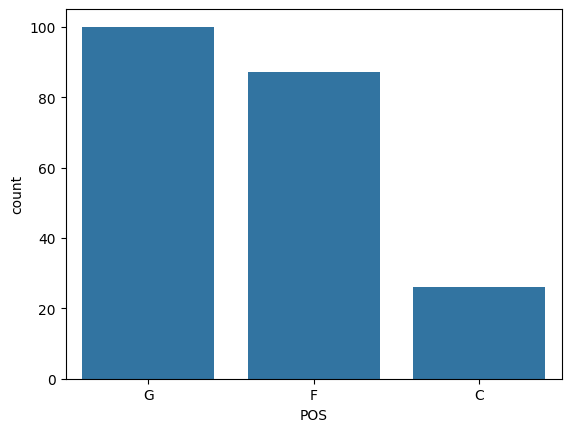

In [68]:
sns.countplot(x = y_train_C)

In [69]:
y_train_C.value_counts()

POS
G    100
F     87
C     26
Name: count, dtype: int64

Nuestra variable objetivo esta muy imbalanceada, esto puede llevar al sobreajuste en las variables mayoritarias y poco aprendizaje de la variable `C`. Para solucionar esto, usaremos un SMOTE.

Primero codificamos la variable objetivo a clases númericas.

`G` será 0, `F` será 1 y `C` será 2

In [70]:
encode_dict = {'G':0, 'F':1, 'C':2}
y_train_C = y_train_C.replace(encode_dict)
y_train_C.unique()

C:\Users\Rafa\AppData\Local\Temp\ipykernel_12648\3993336845.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_C = y_train_C.replace(encode_dict)


array([0, 1, 2], dtype=int64)

In [71]:
smote = SMOTE()

In [72]:
X_smote_C, y_smote_C = smote.fit_resample(X_train_C, y_train_C)

c:\Users\Rafa\anaconda3\envs\Lab_datos\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Rafa\anaconda3\envs\Lab_datos\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [73]:
y_smote_C.value_counts()

POS
0    100
1    100
2    100
Name: count, dtype: int64

Text(0.5, 0, 'POS')

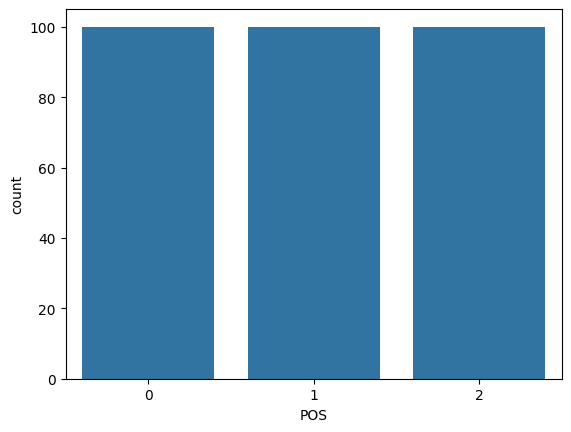

In [74]:
ax = sns.countplot(x = y_smote_C)
ax.set_xlabel('POS')

La variable objetivo ya tiene una distribución que nos permite el entrenamiento óptimo del modelo.


Sin embargo, seguimos teniendo las mismas variables con una alta correlación, lo que sigue es hacer la selección de variables.

### Selección de Variables

Ya que la variable a predecir es categorica, pero los inputs son numéricos, un buen método de selección de variables es el método de ANOVA

In [75]:
significativas = []
ns = []
var_num = X_smote_C.columns

unique_values = y_smote_C.astype(str).unique()

for variable in var_num:
    
    grupos = []
    for valor in unique_values:
        grupo = X_smote_C[y_smote_C.astype(str) == valor][variable]
        
        if len(grupo) > 0:
            grupos.append(grupo)
    
    if len(grupos) > 0:
        F,p = stats.f_oneway(*grupos)
    
        if p < 0.05:
            significativas.append(variable)
        else:
            ns.append(variable)
    
    else:
        print(f"La variable {variable} no se tomó en cuenta por falta de componentes en el grupo")
       
print(f"Las variables significativas para predecir POS son {significativas}")
print(f"Las variables no significativas para predecir POS son {ns}")

Las variables significativas para predecir POS son ['Age', 'L', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2']
Las variables no significativas para predecir POS son ['GP', 'W', 'Min', 'PTS', 'FGM', 'FTM', 'FTA', 'TD3', '+/-']


A través de un ANOVA, hemos visto que las variables más importantes para un modelo de clasificación son las siguientes:

In [76]:
print(significativas)

['Age', 'L', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2']


In [77]:
X_smote_Ca = X_smote_C[significativas]
X_smote_Ca.head()

,Age,L,FGA,FG%,3PM,3PA,3P%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2
0,25,35,452,41.2,24,111,21.6,73.6,27,140,167,261,82,75,25,122,1284,1
1,26,22,382,49.2,133,269,49.4,94.9,15,143,158,91,46,32,5,82,937,0
2,36,23,328,48.8,30,104,28.8,74.4,38,106,144,69,46,18,17,99,772,0
3,22,26,595,43.9,103,266,38.7,78.0,8,140,148,136,57,43,17,57,1208,0
4,25,35,1114,54.0,1,12,8.3,80.6,184,504,688,240,187,88,61,208,2975,31


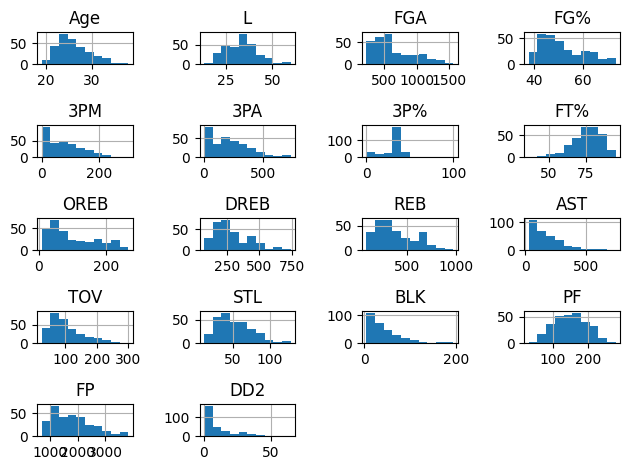

In [78]:
X_smote_Ca.hist()
plt.tight_layout()

Por último, revisemos si tenemos outliers en los datos.

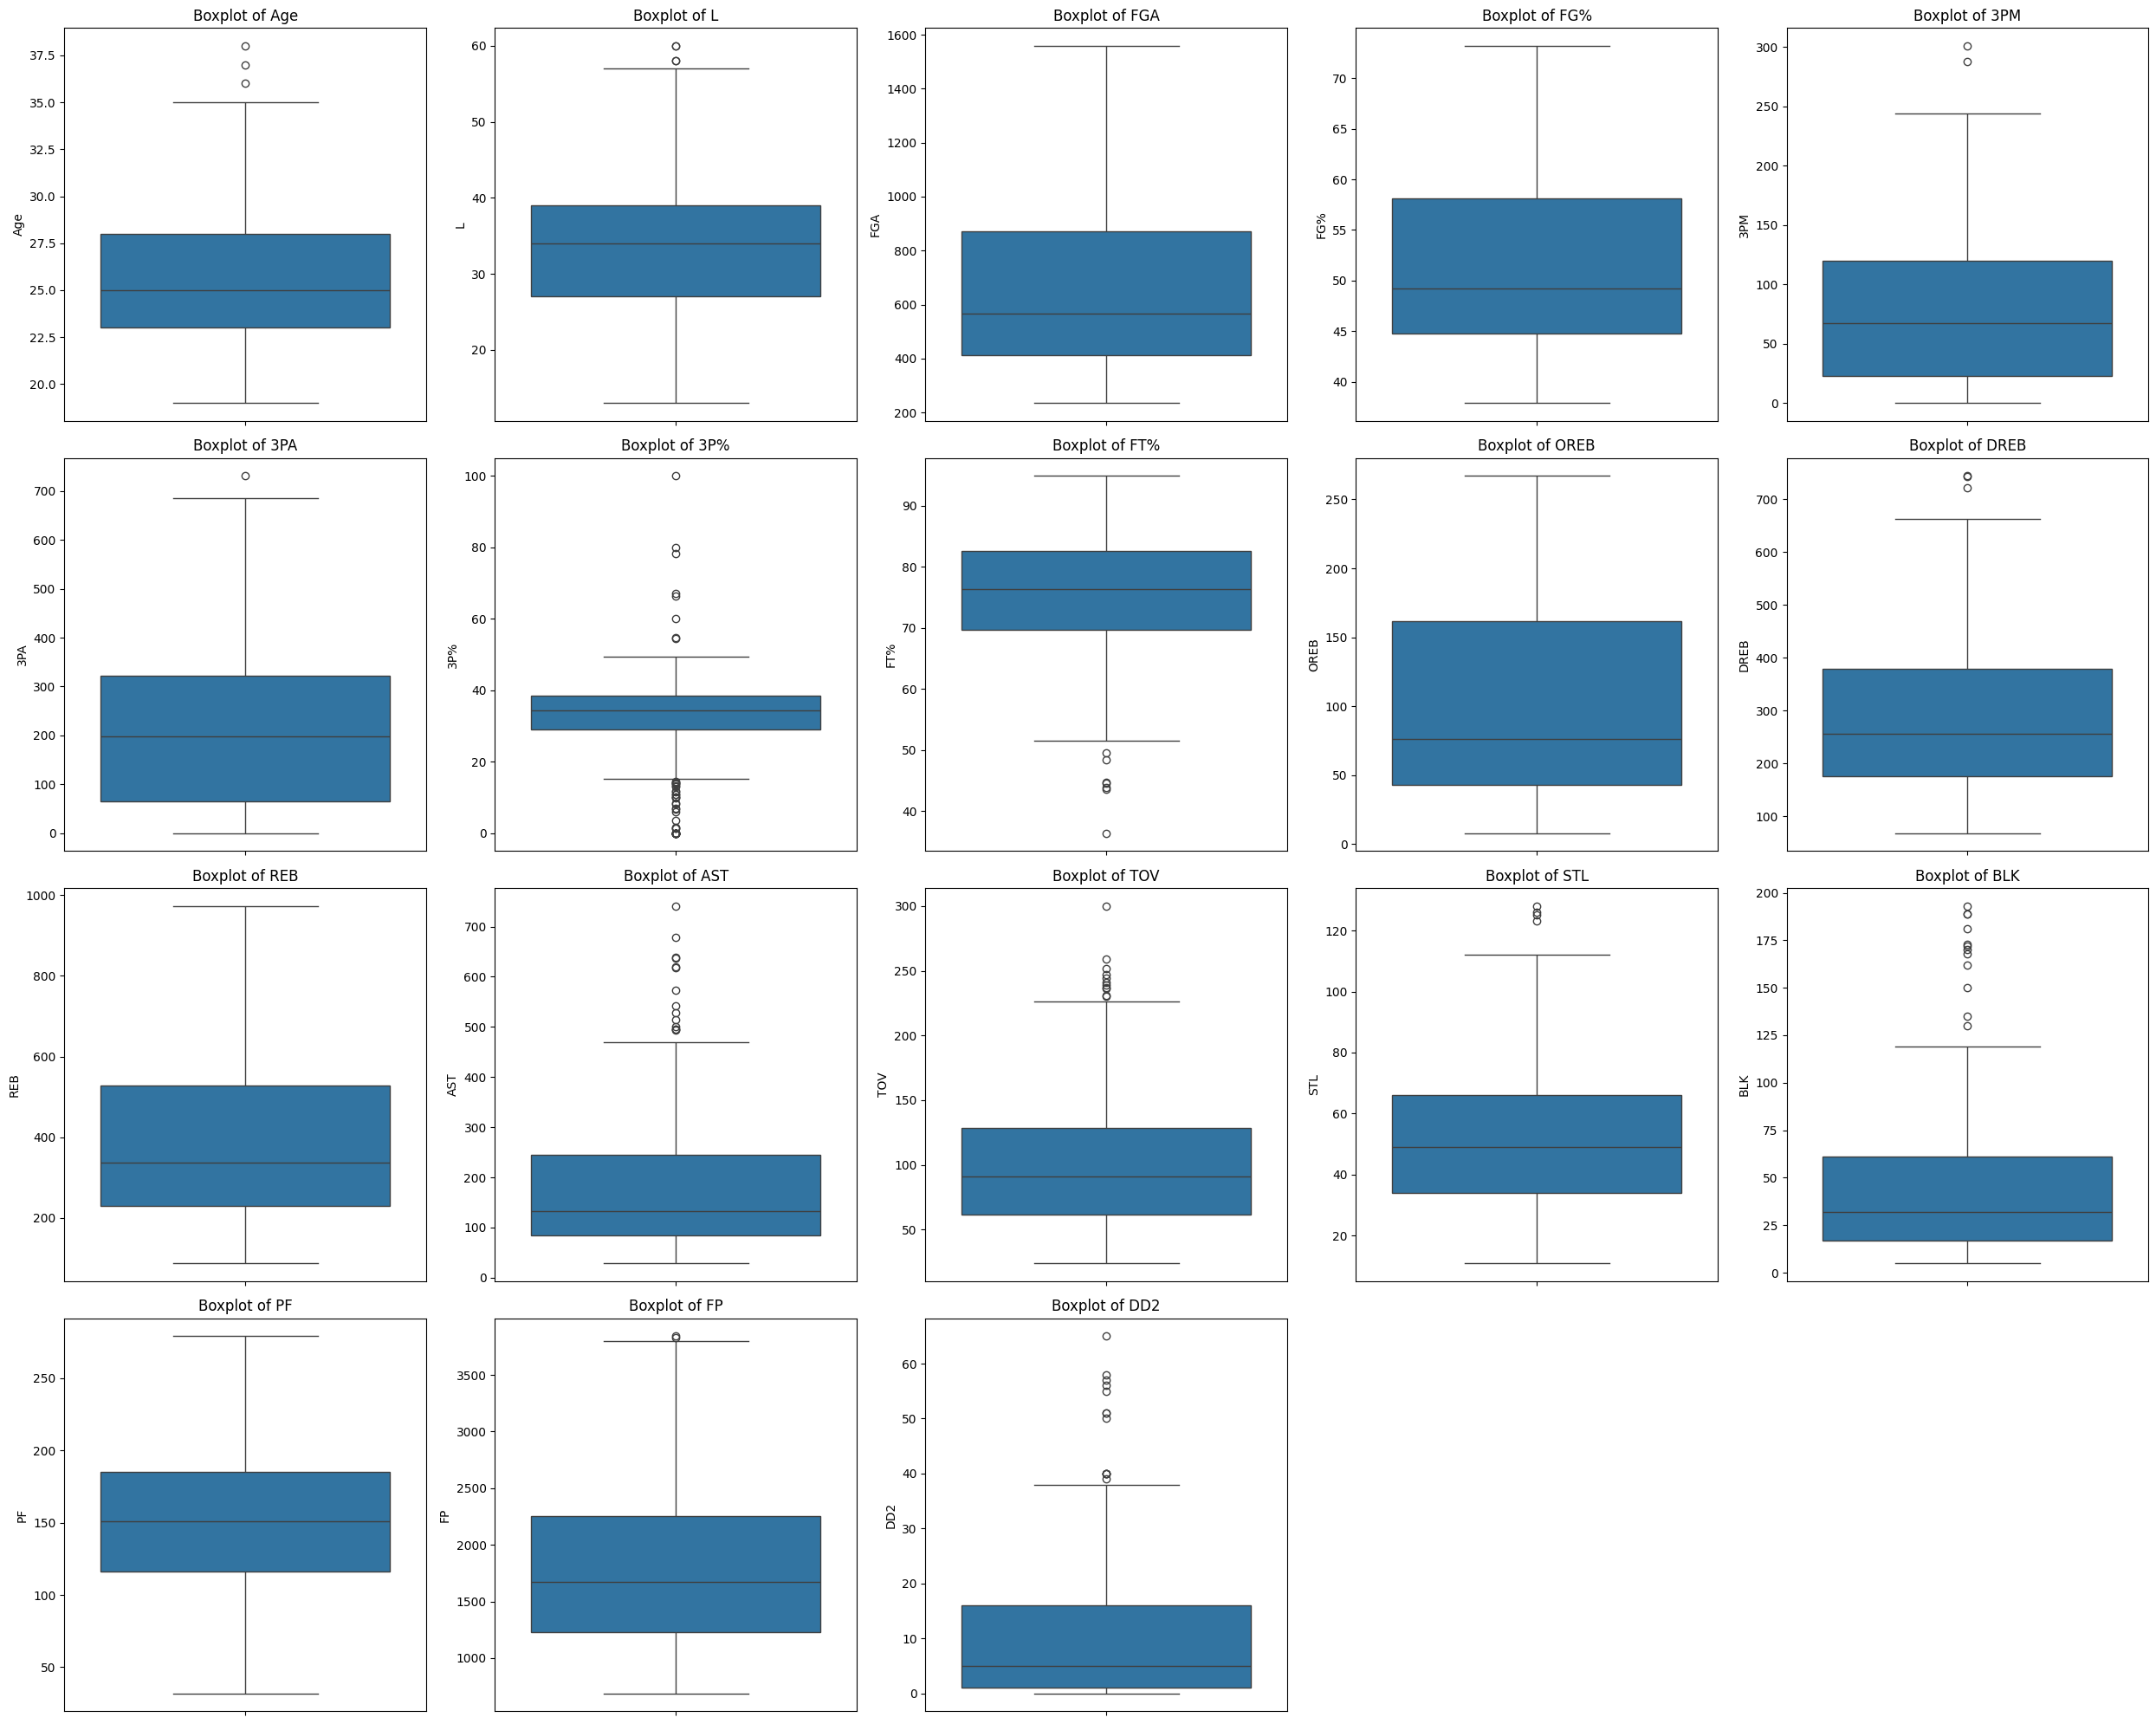

In [79]:
plot_boxplots(X_smote_Ca)

## Modelado

Todo parece apuntar que, por la distribución de los datos, la cantidad disponible de estos y la naturaleza de la variable a predecir, el modelo que nos podría dar los mejores resultados sería una Supported Vector Classifier (SVC)

Aún así, realizaremos pruebas con diferentes modelos para comprobar o refutar nuestra hipotesis.

La métrica con la que evaluaremos sera el accuracy ya que, como hemos balanceado nuestra variable objetivo, queremos obtener una idea general de que tambien clasifican los modelos.

Bibliotecas para la evaluación de los modelos:

In [80]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [81]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=444)

Pongamos los datos de prueba en el mismo formato que los datos de entrenamiento para poder tener una referencia de datos no vistos al evaluar.

In [82]:
X_test_Ca = X_test_C[significativas]

In [83]:
y_test_C = y_test_C.replace(replace_dict)
y_test_C = le.fit_transform(y_test_C)
y_test_C = pd.Series(y_test_C)

### Supported Vector Classifier (SVC)

In [84]:
from sklearn.svm import SVC

Este algoritmo funciona muy bien si se tiene un conjunto de datos estandarizados, haremos una transformación para mejorar esto.

In [85]:
sscaler_X = StandardScaler()

X_smote_Ca_scaled = sscaler_X.fit_transform(X_smote_Ca)
X_test_Ca_scaled = sscaler_X.fit_transform(X_test_Ca)

Una vez escalados los datos, podemos empezar a entrenar el modelo.

Busquemos los mejores parametros:

In [86]:
svc = SVC(kernel = 'rbf')

param_grid_svc = {
    'C': [0.1, 1, 10, 25, 50, 100, 150],        
    'gamma': [0.07, 0.08, 0.09, 0.1, 0.11], 
    'class_weight': [None, 'balanced'] 
}

grid_svc = GridSearchCV(estimator= svc, param_grid= param_grid_svc, scoring="accuracy", cv=k_fold , verbose=1, error_score="raise")
grid_svc.fit(X_smote_Ca_scaled, y_smote_C)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=444, shuffle=True),
             error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 25, 50, 100, 150],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.07, 0.08, 0.09, 0.1, 0.11]},
             scoring='accuracy', verbose=1)

In [87]:
grid_svc.best_params_

{'C': 25, 'class_weight': 'balanced', 'gamma': 0.08}

In [88]:
svc = grid_svc.best_estimator_
svc

SVC(C=25, class_weight='balanced', gamma=0.08)

In [89]:
SVCCV_accuracy = (cross_val_score(svc, X_smote_Ca_scaled, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVCCV_accuracy

0.8233333333333335

Veamos los resultados con datos que no ha visto:

In [90]:
SVCCV_accuracy_test = (cross_val_score(svc, X_test_Ca_scaled, y_test_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVCCV_accuracy_test

0.78

En general son buenos resultados y es compacto computacionalmente, se entreno más rápido gracias a que sabiamos el tipo de kernel que iba a usar.

### Decision Trees

In [91]:
from sklearn.tree import DecisionTreeClassifier

En este caso, no nos conviene estandarizar los datos porque no es realmente necesario para el modelo.

In [92]:
dtree = DecisionTreeClassifier()

param_grid_dtree = {
    'criterion': ['gini', 'entropy'],       
    'max_depth': [None, 5, 10, 15, 20],      
    'min_samples_split': [2, 5, 10, 15],     
    'min_samples_leaf': [1, 2, 5, 10],      
    'max_features': ['sqrt', 'log2'], 
    'class_weight': [None, 'balanced']      
}

grid_trees = GridSearchCV(estimator= dtree, param_grid= param_grid_dtree, scoring="accuracy", cv=5 , verbose=1, error_score="raise")

grid_trees.fit(X_smote_Ca, y_smote_C)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy', verbose=1)

In [93]:
print(grid_trees.best_params_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [94]:
dtree = grid_trees.best_estimator_
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [95]:
DTREECV_accuracy = (cross_val_score(dtree, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_accuracy

0.7

Con datos nuevos:

In [96]:
DTREECV_accuracy_test = (cross_val_score(dtree, X_test_Ca, y_test_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_accuracy_test

0.55

El tuneo de hiperparametros fue más tardado que el de SVC, esto se debe a la cantidad de parametros que tiene. Además, los resultados no fueron tan buenos como los del decision trees.

A continuación haremos los pesos pesados, estos son modelos más complicados computacionalmente pero que nos pueden hacer obtener mejores resultados.

### XGBoost

In [97]:
from xgboost import XGBClassifier

Si quisieramos buscar los parametros solo con un GridSearch como lo hemos hecho en los modelos anteriores, el fine-tuning tardaría bastante tiempo. Así que, usaremos gráficas para darnos una idea de donde se podrían encontrar los valores optimos y posteriormente haremos el GridSearch.

In [98]:
xgbc = XGBClassifier(objective= "multi:softmax", seed=444)

In [99]:
XGBCCV_accuracy = (cross_val_score(xgbc, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBCCV_accuracy

0.8033333333333333

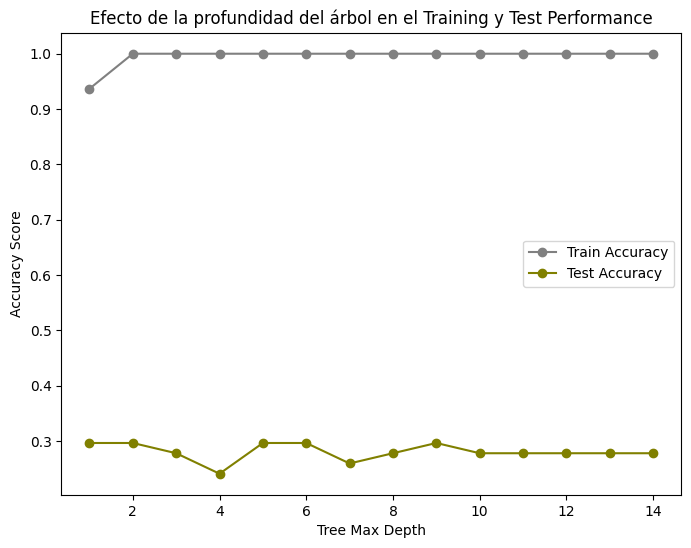

In [100]:
max_depth = range(1, 15)
train_scores = []
test_scores = list()

for depth in max_depth:
    xgbc = XGBClassifier(max_depth = depth, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_scores, label='Train Accuracy', color='gray', marker='o')
plt.plot(max_depth, test_scores, label='Test Accuracy', color='olive', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()



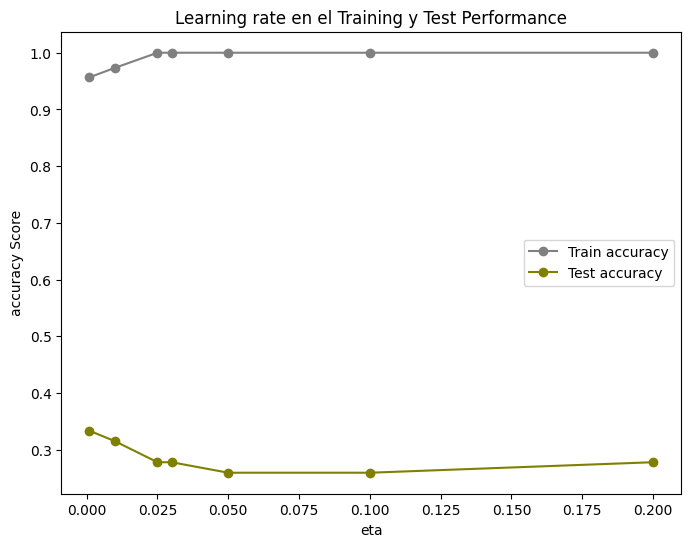

In [101]:
eta = [0.001, 0.01, 0.025, 0.03, 0.05, 0.1, 0.2]
train_scores = []
test_scores = list()

for value in eta:
    xgbc = XGBClassifier(learning_rate = value, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(eta, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(eta, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('eta')
plt.ylabel('accuracy Score')
plt.title('Learning rate en el Training y Test Performance')
plt.legend()
plt.show()

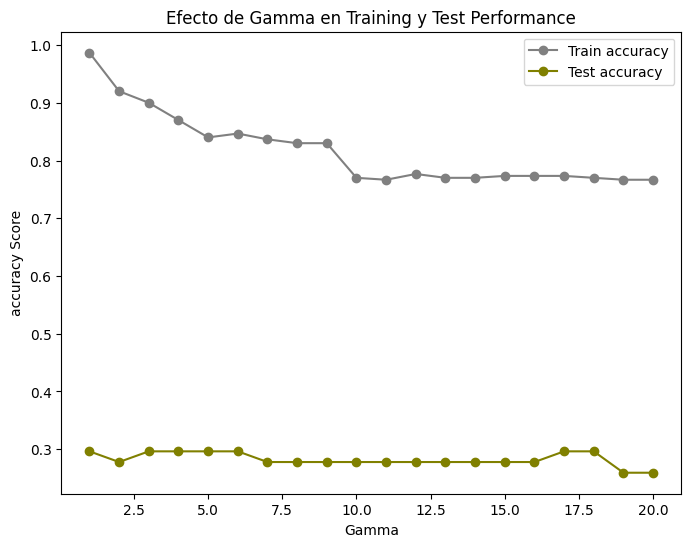

In [102]:
gammas = range(1, 21)
train_scores = []
test_scores = list()

for gamma in gammas:
    xgbc = XGBClassifier(gamma = gamma, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(gammas, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(gammas, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Gamma')
plt.ylabel('accuracy Score')
plt.title('Efecto de Gamma en Training y Test Performance')
plt.legend()
plt.show()

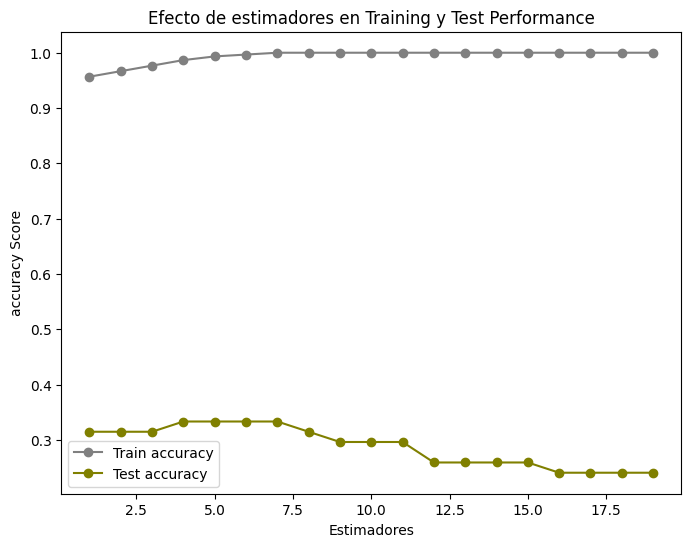

In [103]:
estimators = range(1,20)
train_scores = []
test_scores = list()

for estimator in estimators:
    xgbc = XGBClassifier(n_estimators = estimator, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(estimators, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(estimators, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Estimadores')
plt.ylabel('accuracy Score')
plt.title('Efecto de estimadores en Training y Test Performance')
plt.legend()
plt.show()

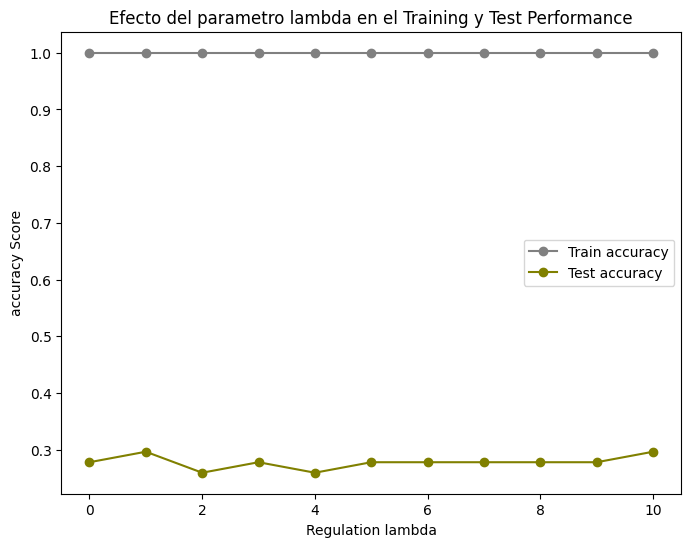

In [104]:
lambdas = range(0, 11)
train_scores = []
test_scores = list()

for lambd in lambdas:
    xgbc = XGBClassifier(reg_lambda = lambd, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(lambdas, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Regulation lambda')
plt.ylabel('accuracy Score')
plt.title('Efecto del parametro lambda en el Training y Test Performance')
plt.legend()
plt.show()

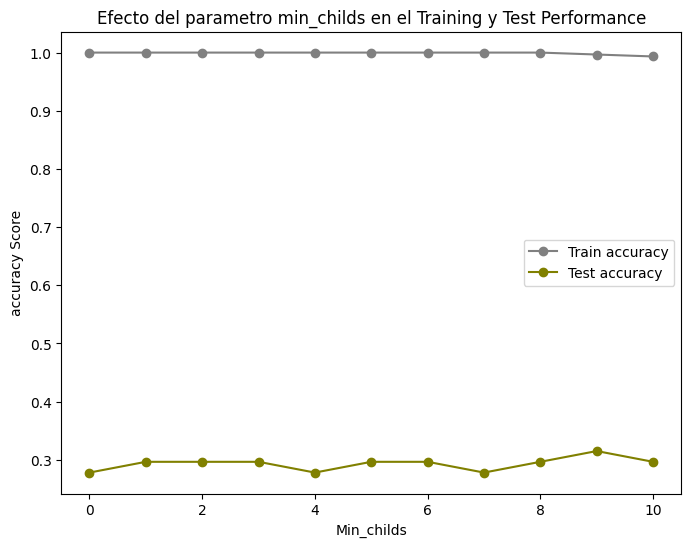

In [105]:
min_childs = range(0, 11)
train_scores = []
test_scores = list()

for child in min_childs:
    xgbc = XGBClassifier(min_child_weight = child, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(min_childs, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(min_childs, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Min_childs')
plt.ylabel('accuracy Score')
plt.title('Efecto del parametro min_childs en el Training y Test Performance')
plt.legend()
plt.show()

Ya tenemos una idea de por donde pueden estar los hiperparametros, aún asi veamos cual es la mejor combinación:

In [106]:
param_grid_xgbc = {"reg_lambda": [0, 1, 3],
             "gamma": [4, 10],
             "learning_rate": [0.01, 0.1, 0.2],
             "max_depth": [1, 3],
             'n_estimators': [2, 5, 13],
             'min_child_weight': [4, 6]}

xgbc = XGBClassifier(objective="multi:softmax", seed=444)

xgbc_grid = GridSearchCV(estimator= xgbc, param_grid= param_grid_xgbc, scoring="accuracy", cv=5, verbose=1)
xgbc_grid.fit(X_smote_Ca, y_smote_C)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'gamma': [4, 10], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 3], 'min_child_weight': [4, 6],
                         'n_estimators': [2, 5, 13], 'reg_lambda': [0, 1, 3]},
             scoring='accuracy', verbose=1)

In [107]:
print(xgbc_grid.best_params_)

{'gamma': 4, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 13, 'reg_lambda': 0}


In [108]:
xgbc = xgbc_grid.best_estimator_
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [109]:
XGBCCV_accuracy = (cross_val_score(xgbc, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBCCV_accuracy

0.7299999999999999

Ahora en los datos de prueba:

In [110]:
XGBCCV_accuracy_test = (cross_val_score(xgbc, X_test_Ca, y_test_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBCCV_accuracy_test

0.7433333333333334

### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc = RandomForestClassifier()

In [113]:
RFCCV = (cross_val_score(rfc, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
RFCCV

0.78

Hiperparametros:

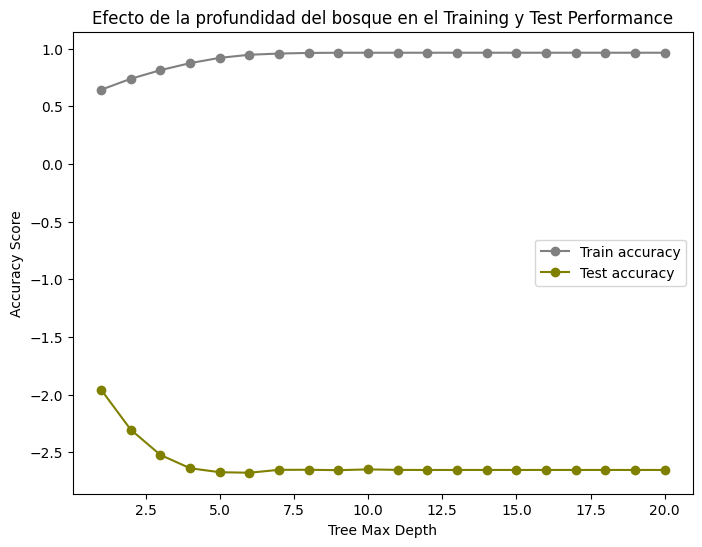

In [114]:
max_depth = range(1,21)
train_scores = []
test_scores = []

for depth in max_depth:
    forest = RandomForestRegressor(max_depth=depth, random_state=444)
    forest.fit(X_smote_Ca, y_smote_C)
    train_scores.append(forest.score(X_smote_Ca, y_smote_C))
    test_scores.append(forest.score(X_test_Ca, y_test_C))

plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(max_depth, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

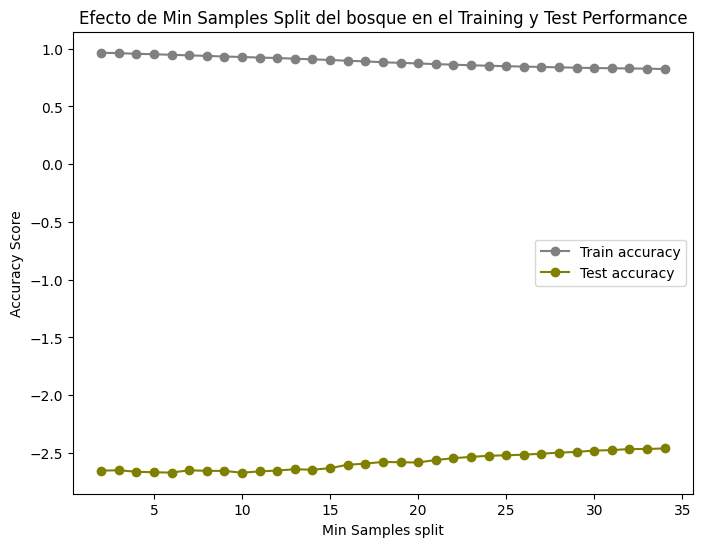

In [115]:
min_samples = range(2, 35)
train_scores = list()
test_scores = list()

for sample in min_samples:
    forest = RandomForestRegressor(min_samples_split= sample, random_state=444)
    forest.fit(X_smote_Ca, y_smote_C)
    train_scores.append(forest.score(X_smote_Ca, y_smote_C))
    test_scores.append(forest.score(X_test_Ca, y_test_C))

plt.figure(figsize=(8, 6))
plt.plot(min_samples, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(min_samples, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Min Samples split')
plt.ylabel('Accuracy Score')
plt.title('Efecto de Min Samples Split del bosque en el Training y Test Performance')
plt.legend()
plt.show()

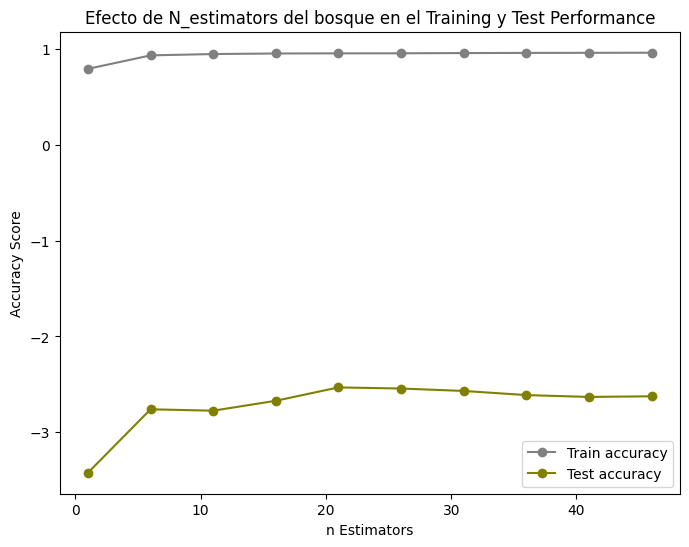

In [116]:
estimators = range(1,50, 5)
train_scores = []
test_scores = []

for estimator in estimators:
    forest = RandomForestRegressor(n_estimators= estimator, random_state=444)
    forest.fit(X_smote_Ca, y_smote_C)
    train_scores.append(forest.score(X_smote_Ca, y_smote_C))
    test_scores.append(forest.score(X_test_Ca, y_test_C))

plt.figure(figsize=(8, 6))
plt.plot(estimators, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(estimators, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('n Estimators')
plt.ylabel('Accuracy Score')
plt.title('Efecto de N_estimators del bosque en el Training y Test Performance')
plt.legend()
plt.show()

In [117]:
param_grid_forest = {"min_samples_split": [0, 3, 5],
             "max_depth": [4, 5, 6],
             'n_estimators': [5, 10, 15]}

forest = RandomForestClassifier()

forest_grid = GridSearchCV(estimator= forest, param_grid= param_grid_forest, scoring="accuracy", cv=k_fold, verbose=1)
forest_grid.fit(X_smote_Ca, y_smote_C)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


c:\Users\Rafa\anaconda3\envs\Lab_datos\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rafa\anaconda3\envs\Lab_datos\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Rafa\anaconda3\envs\Lab_datos\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Rafa\anaconda3\envs\Lab_datos\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

GridSearchCV(cv=KFold(n_splits=10, random_state=444, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6], 'min_samples_split': [0, 3, 5],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy', verbose=1)

In [118]:
print(forest_grid.best_params_)

{'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 15}


In [119]:
rfc = forest_grid.best_estimator_
rfc

RandomForestClassifier(max_depth=6, min_samples_split=3, n_estimators=15)

In [120]:
RFCCV_accuracy = (cross_val_score(rfc, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
RFCCV_accuracy

0.8000000000000002

Con los datos nuevos:

In [121]:
RFCCV_accuracy_test = (cross_val_score(rfc, X_test_Ca, y_test_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
RFCCV_accuracy_test

0.7666666666666667

En general, obtuvimos resultados buenos pero no ideales. Veamos una comparación de todos.

In [122]:
models = pd.DataFrame({
    'Models': ['Support Vector Classifier', 'Decision Tree Classifier', 'XGBoost', 'Random Forest Classifier'],
    'Score_CV':  [SVCCV_accuracy, DTREECV_accuracy, XGBCCV_accuracy, RFCCV_accuracy],
    'Score_test':  [SVCCV_accuracy_test, DTREECV_accuracy_test, XGBCCV_accuracy_test, RFCCV_accuracy_test]})

models.sort_values(by=['Score_CV', 'Score_test'], ascending=False)

,Models,Score_CV,Score_test
0,Support Vector Classifier,0.823333,0.780000
3,Random Forest Classifier,0.800000,0.766667
2,XGBoost,0.730000,0.743333
1,Decision Tree Classifier,0.700000,0.550000


Con una clara ventaja, podemos decir que, efectivamente, el SVC fue el modelo que nos brindó los mejores resultados. Esto se debe a la cantidad de información disponible, la estandarización previa al entrenamiento y la dimensionalidad de los datos.

El SVC es una muy buena opción para este tipo de problemas por el tiempo que tardamos en entrenarlo, no necesita tanto fine-tuning como el random forest y el XGBoost y no supone una carga fuerte computacional por la cantidad de datos que tenemos. Creemos que aprendío muy bien con los datos escalados y a pesar de los outlier obtuvo muy buenos resultados.

Tanto el Random Forest Classifier y el XGBoost obtuvieron buenos resultados pero, nos hubieran podido servir más si hubieramos tenido una mayor cantidad de datos de los cuales se pudiera aprender, además de que requirieron un trabajo previo mucho más grande para poder encontrar los hiperparametros y son pesados computacionalmente.

Decision Tree Classifier obtuvo los peores resultados de los 4. Esto se puede deber a que es un modelo mucho más simple y no es muy bueno con problemas de alta dimensionalidad como lo era este dataset.

### Prueba con datos que no ha visto anteriormente:

En este caso, probaremos el modelo con datos historicos. Usaremos los datos de Michael Jordan y Stephen Curry, unos de los `Guards` más famosos de la historia. Al igual que en la regresión, usaremos los datos de sus temporadas más importantes de su carrera.

In [212]:
jordan_curry_C = [[32, 10, 1893, 49.5, 111, 260, 42.7, 83.4, 79, 402, 481, 352, 197, 180, 43, 136, 4068.2, 3],
        [27,  9, 1598, 50.4, 402, 886, 45.4, 90.8, 44, 319, 363, 527, 295, 169, 24, 194, 3885.1, 8]]
jordan_curry_C_test = pd.DataFrame(data=jordan_curry_C, columns=X_smote_Ca.columns)
jordan_curry_C_test

,Age,L,FGA,FG%,3PM,3PA,3P%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2
0,32,10,1893,49.5,111,260,42.7,83.4,79,402,481,352,197,180,43,136,4068.2,3
1,27,9,1598,50.4,402,886,45.4,90.8,44,319,363,527,295,169,24,194,3885.1,8


In [213]:
sscaler_X.fit(X_smote_Ca)
jordan_curry_C_test_scaled = sscaler_X.transform(jordan_curry_C_test)
jordan_curry_C_test_scaled

array([[ 1.64563345, -2.70906017,  4.03565277, -0.2383696 ,  0.54443821,
         0.29476274,  0.82791272,  0.80793144, -0.32013549,  0.83960801,
         0.47835211,  1.29068028,  1.7769831 ,  5.56214871, -0.05626028,
        -0.34209349,  3.12972701, -0.59337137],
       [ 0.30626819, -2.82417604,  3.07431235, -0.13532934,  5.13976414,
         4.04291383,  1.02109582,  1.532698  , -0.81200301,  0.2420137 ,
        -0.12424796,  2.60777778,  3.61679516,  5.08326612, -0.56367104,
         0.92384159,  2.87554026, -0.21316759]])

In [214]:
pos_predicts = svc.predict(jordan_curry_C_test_scaled)
pos_predicts

array([0, 0], dtype=int64)

In [219]:
inverse_encode_dict = { 0:'G', 1:'F', 2:'C'}

In [222]:
mapped_positions = [inverse_encode_dict[num] for num in pos_predicts]
mapped_positions

['G', 'G']

El modelo logro predecir correctamente la posición de ambos jugadores, identificando a dos de los iconos más grandes del juego.

### Variables más importantes

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
perm_importance = permutation_importance(svc, X_smote_Ca_scaled, y_smote_C, scoring='accuracy', random_state=444)

# Mostrar la importancia de las características
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {i}: {perm_importance.importances_mean[i]:.4f}")

Feature 9: 0.1227
Feature 11: 0.1173
Feature 13: 0.1147
Feature 3: 0.0973
Feature 7: 0.0773
Feature 14: 0.0767
Feature 10: 0.0640
Feature 15: 0.0620
Feature 12: 0.0607
Feature 6: 0.0573
Feature 0: 0.0467
Feature 17: 0.0447
Feature 1: 0.0420
Feature 2: 0.0413
Feature 5: 0.0347
Feature 8: 0.0247
Feature 4: 0.0233
Feature 16: 0.0100


In [ ]:
X_smote_Ca.columns[[12, 8, 10, 6, 13]]

Index(['TOV', 'OREB', 'REB', '3P%', 'STL'], dtype='object')

Estas variables hacen sentido si entendemos la manera en que funcionan las posiciones de basquetbol. 

Los `STL` o robos de pelota suelen ser para jugadores mucho más ágiles y habiles. Mientras que los `DREB` o rebotes defensivos, suelen ser para jugadores mucho más altos que se encargan de proteger el aro. 

Se puede asumir que hay ciertas habiidades y estadísticas en las que algunas posiciones destacan mucho más que otras y se entiende perfectamente por el rol que deben de cumplir cada uno en la cancha. Se esperan cosas diferentes de cada uno.

1. **Definición del problema**. El estudiante debe definir un problema a ser resuelto, basado en la selección de un conjunto de datos de un problema que sea de su interés. Es importante que los datos seleccionados correspondan a un problema de **clasificación** de forma que cumpla con el objetivo de la sección de este proyecto. Si la selección de los datos es complicada, como sugerencia pueden tomar el que sea de su interés de las siguientes páginas:

http://archive.ics.uci.edu/ml/

https://www.kdnuggets.com/datasets/index.html

https://www.kaggle.com/datasets

https://data.world/

NOTA: Si tienes alguna duda sobre si el dataset elegido es el correcto para el problema a resolver de regresión me puedes consultar y lo analizamos. 

2. **Visualización, exploración, preparación y análisis de datos:** 
- Extracción de información estadística básica en los datos analizados.
- En esta fase las características de las bases de datos deben ser mencionadas (datos nulos, datos sesgados, datos atípicos, distribución de datos, datos imbalanceados en la variable de salida, etc.)
- Limpieza de datos
- En esta fase de debe mencionar y mostrar el proceso y decisiones tomadas para procesar y limpiar estos datos. 
- Se deben incluir gráficos interesantes que muestren el comportamiento de los datos y cómo se relacionan, así como acompañar los gráficos con una explicación de lo que se observa en el gráfico.  

 

### Engrega 2:

En esta fase se debe entregar lo que se hizo en la entrega 1 con sus respectivas correcciones más los siguientes puntos:

#### Regresión 


3. **Procesar modelo de regresión:** 
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de regresión para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (MSE, MAE, R2) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos. 
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

4. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 


#### Clasificación

3. **Procesar modelo de regresión:** 
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de clasificación para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (precision, recall, accuracy, f1 score, etc.) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos. 
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

4. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 

#### Entrega 3

 - Imagina que le estás presentando tu proyecto a tu jefe (tu jefe no es una persona muy técnica que sepa mucho de código) 
 - Sabiendo esto, en esta entrega se pide hacer una presentación donde hables sobre todo lo interesante que viste en tu proyecto, trata de hacer la presentación lo más entendible posible para que tu jefe comprenda todo lo que tuviste que hacer desde un inicio así como los resultados. (No puedes mostrar código, tiene que ser visual y mostrar resultados). 
 - En esta fase se pide entregar las correcciones sugeridas de las dos entregas pasadas. 


### Calificación

La calificación de cada fase del proyecto incluido en el reporte final es la siguiente:

| Fase | Puntuación | Características Generales |
| --- | --- | --- |
| Definición del problema | 15% | 1. Mencionar el origen de los datos <br /> 2.Dar contexto de los datos (significado de las variables si es posible) <br /> 3. Describir de qué se trata el problema a resolver|
| Preparación de datos | 30% | 1. Incluya **gráficos** y métricas utilizadas para describir la base de datos. <br /> 1. Describir el tratamiento de variables que requieren transformación o modificación de valores. |
| Procesar modelo de regresión/clasificación | 40% | 1. Describir el modelo aplicado. <br /> 2. Evaluar el desempeño de cada modelo utilizando métricas comunes para poder realizar la comparación. <br /> 3. Pruebe los modelos utilizando datasets en común para que la comparación sea válida 4. Aplicación del modelo para predecir datos nuevos|
| Discusión de los resultados | 15% | 1. Resalte sus observaciones validadas por las métricas que se muestran dentro del desarrollo. <br /> 2. Dar conclusión personal de los resultados y el uso o aplicación de los modelos. |

### ¿ Qué debe tener cada entregable?


- El informe del trabajo realizado se entregará digitalmente en un documento elaborado en una computadora (no fotografías de hojas o cuadernos), e incluirá como mínimo:
    - Nombre y apellidos de los alumnos.
    - Es obligatorio que incluyan el código que generaron para realizar la práctica.
    - Es obligatorio que incluyan los archivos que contengan los datos a analizar para cada problema (regresión y clasificación)
